# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb (updated to keras_example), neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [4]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Opening the MC and data frames

In [5]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

# You can display the dataframe by uncommenting these lines and running the cell

Exercise 4:

Identified the extra variables in ```MC_EXT``` as:

```weight``` - a scaling factor showing how good the simulation is.

```true_E``` - the simulation neutrinos energy.

```true_L``` - the simulation nuetrinos length from source and detection.

```true_muon_mu``` - the simulations muons momentum.

In [6]:
# Uncomment these lines to display the dataframes
#pd.set_option('display.max_columns', 100)
# displays top 10 results.
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


In [7]:
MC_EXT.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,...,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,...,53.900658,36.203041,342.578735,1.164239,0.613618,0.624997,0.000002,1.371928,438.602722,0.607686
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,...,53.900658,36.203041,342.578735,1.164239,0.101568,0.093,0.000002,1.371928,438.602722,0.607686
2,141.086923,251.017548,0.025229,5,0.007706,766.055969,-50.159794,172.77446,1.0,0.972468,...,20.804905,117.408989,658.495789,9999.989363,0.670372,0.740995,0.158957,1.798278,440.984772,0.727932
3,10.511966,58.736591,10.511966,4,0.066952,213.629105,117.414757,88.746597,0.929871,0.870984,...,78.443840,50.530334,223.597870,9999.441230,0.246837,0.234,0.192390,0.777679,438.613037,0.489567
4,10.511966,9.962337,3.888895,4,0.066952,235.423004,46.921162,80.265305,0.372258,0.404711,...,78.443840,50.530334,223.597870,9999.441230,0.11096,0.131,0.192390,0.777679,438.613037,0.489567
5,147.929810,289.265442,0.152002,5,0.515178,1031.704712,52.0289,83.527153,1.0,0.9848,...,1.357146,-6.141214,761.806335,9999.934871,0.755327,0.761996,0.986006,1.214413,431.785278,0.826329
6,96.691013,56.727428,27.846855,21,0.998477,1036.508911,-38.234692,19.931959,0.065278,0.902933,...,25.337120,-80.776207,969.163696,10000.275867,0.242116,0.188,0.158957,1.857195,463.048309,1.271057
7,96.691013,67.758522,0.264366,21,0.998477,1036.692261,-78.989571,24.593576,0.966078,0.940751,...,25.337120,-80.776207,969.163696,10000.275867,0.267746,0.346999,0.158957,1.857195,463.048309,1.271057
8,96.691013,25.262609,7.398347,21,0.998477,987.487305,-65.503288,5.5114,0.082593,0.79802,...,25.337120,-80.776207,969.163696,10000.275867,0.161958,0.099,0.158957,1.857195,463.048309,1.271057
9,106.679589,73.540779,0.226748,5,0.040650,769.010193,110.767021,45.539276,0.950805,0.911611,...,1.250130,53.412140,759.350220,9999.371950,0.280941,0.384999,0.194167,0.890958,445.648376,0.478177


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [8]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Removing high energy (unphysical) monte carlo results
MC_EXL_VIS = MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)


Length of new data sample: 14279


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,...,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,0.212770,66.349129,0.21277,4,0.113965,510.334656,-32.665115,87.828362,0.902358,0.859688,...,27.947468,-56.690453,501.216614,0.284587,0.264508,0.205,1.802795e-01,1.769054,452.566559,1.484876
1,49.655053,522.806458,0.71338,21,0.999669,773.578064,-2.213004,134.35881,1.0,0.98865,...,107.624619,35.683361,287.466248,1.791479,1.28983,1.189008,4.585486e-07,1.434417,446.409882,1.398277
2,122.774142,119.327393,1.053906,21,0.969243,727.855408,36.40123,135.263168,0.998649,0.870173,...,141.006119,-71.510231,679.523926,0.988671,0.382438,0.336999,1.589572e-01,0.960485,446.445435,0.368765
3,165.161477,89.313118,0.072633,21,0.463541,158.098022,-4.776449,53.588886,0.996315,0.893925,...,125.456421,-46.236980,125.643852,0.628190,0.316378,0.342999,1.589572e-01,0.745364,446.004974,0.340834
4,0.164210,129.214554,0.16421,4,0.010173,506.233978,31.345934,196.020889,0.999034,0.945349,...,97.245438,108.338142,536.208008,0.639442,0.403994,0.453998,2.168520e-01,0.522012,446.751465,0.262242
5,160.177289,57.503132,1.395834,21,0.384175,879.868835,71.994934,49.888504,0.954819,0.866853,...,6.820090,100.240623,854.380005,0.598513,0.243942,0.202,1.589572e-01,0.828762,462.149017,0.244909
6,0.245711,194.629196,0.245711,4,0.040160,216.379089,-90.725792,189.44429,1.0,0.958611,...,215.778305,95.038147,166.982895,0.913944,0.546408,0.528997,1.589572e-01,0.856847,436.780701,NaN
7,89.980539,10.507598,1.398539,21,0.817869,350.72757,98.349831,108.144814,0.20886,0.072313,...,98.363777,103.730049,349.412628,1.014630,0.113232,0.076,1.589572e-01,1.027763,458.817078,0.658622
8,33.205805,43.233894,0.279821,4,0.076223,775.384155,108.85453,151.539703,0.974778,0.732876,...,139.542404,69.342041,764.098267,0.364203,0.209578,0.23,1.589572e-01,1.208564,426.932770,NaN
9,95.085156,91.923035,0.539952,21,0.978062,437.432251,63.066048,220.689957,0.99086,0.951699,...,208.877182,70.722366,346.664825,0.787007,0.322181,0.446998,1.589572e-01,1.105179,451.749298,0.224305


# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

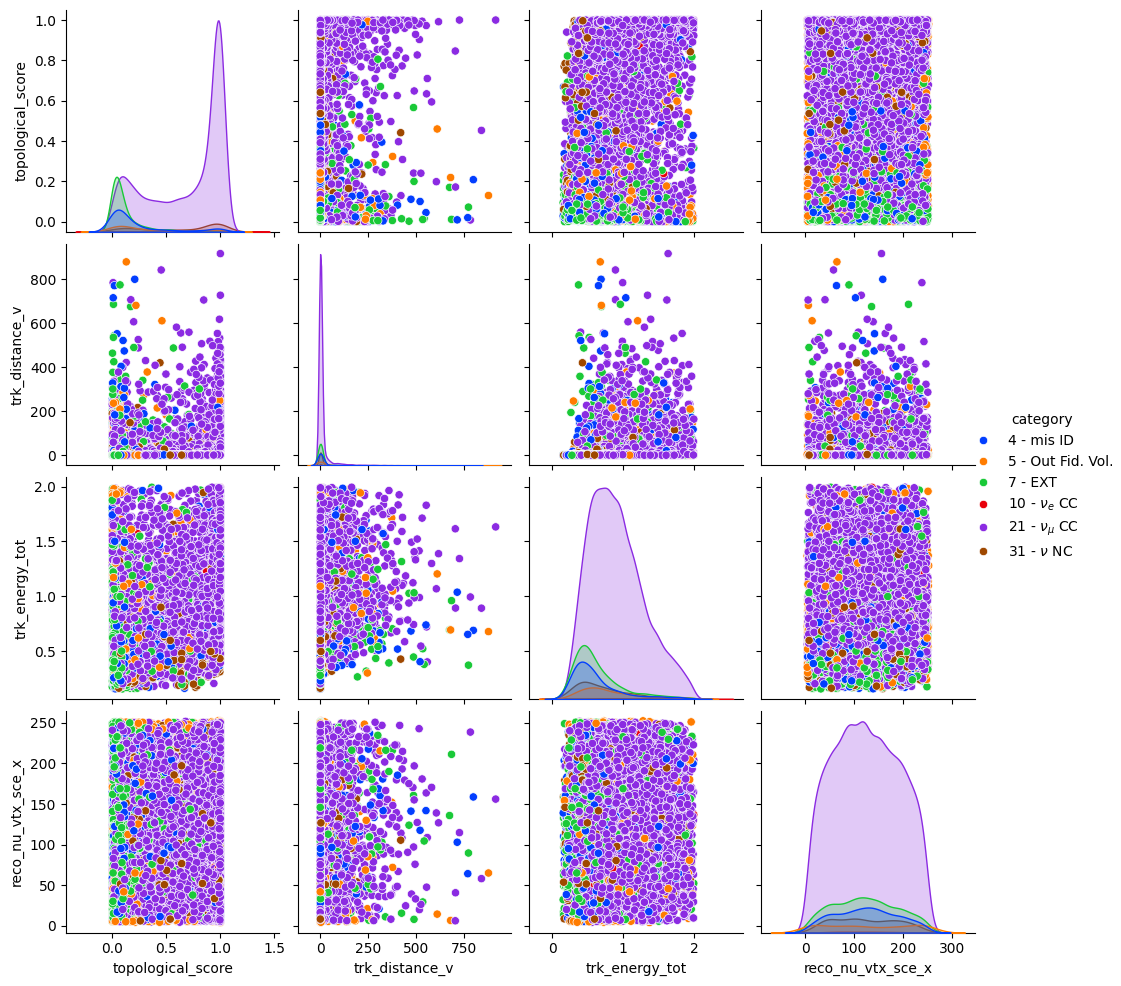

In [9]:
# Visualising a couple of variables.
variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [10]:
# Create a deep copy of MC_EXT_VIS without signal events
MC_EXT_VIS_rem_21 = MC_EXT_VIS.copy(deep = True)
MC_EXT_VIS_rem_21 = MC_EXT_VIS_rem_21[~MC_EXT_VIS_rem_21['category'].isin([21])]

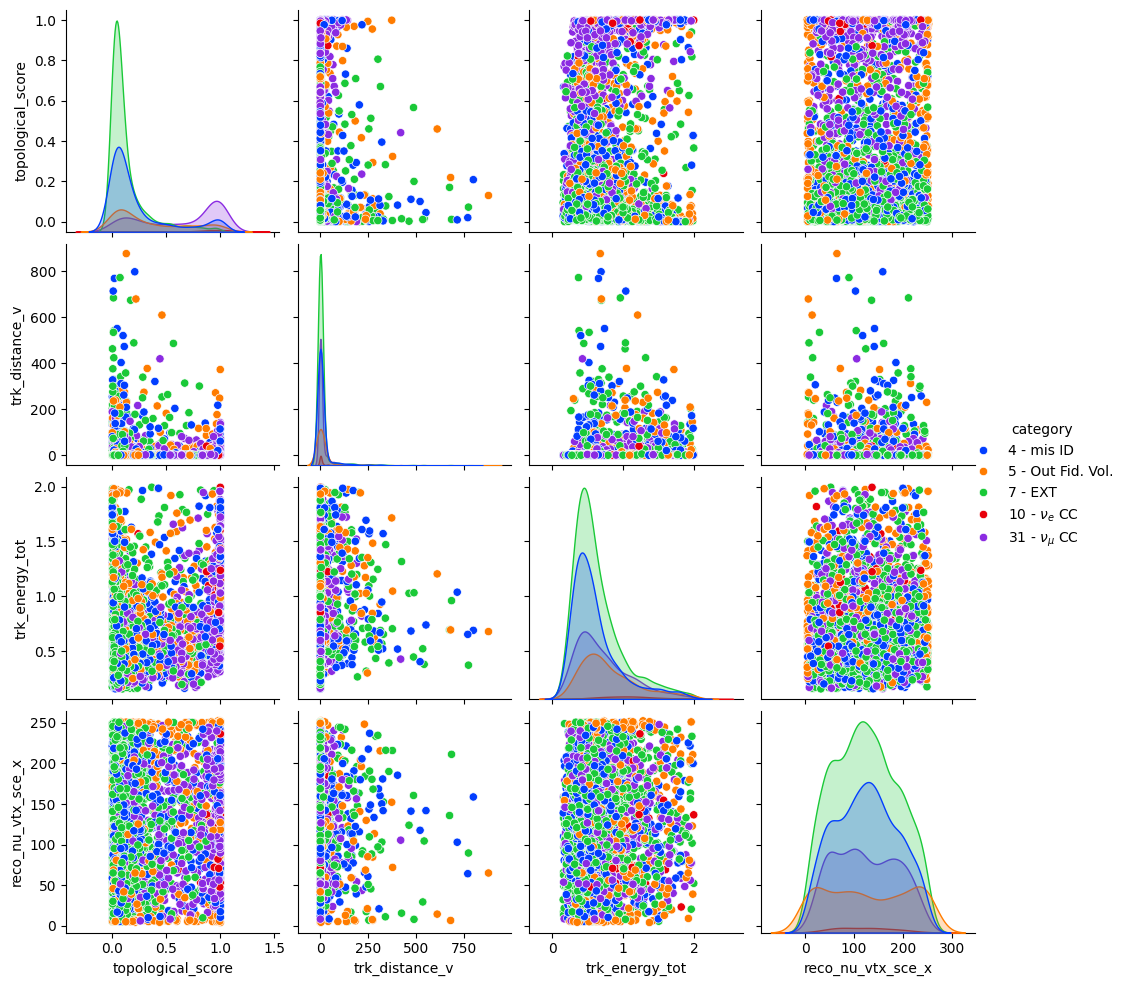

In [11]:
# Plot your background events using sns.pairplot

# List of categories (excluding signal) in text
ptype_no_mu = [r"mid ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS_rem_21[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))


In [12]:
# Make sure to delete dataframe copies if you no longer need them!
del MC_EXT_VIS
del MC_EXT_VIS_rem_21

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the skikit-learn package.

In [13]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))


# Remove muon neutrino and electron neutrino events.
MC_EXT_ML = MC_EXT_ML[~MC_EXT_ML['category'].isin([10, 21])]
# We did this to remove the dominant signal events and focus on background classification.

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Length of MC dataframe:  31921


In [14]:
# Setting up input parameters for random forest.
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category']) # Why can't we do y = MC_EXT_ML.category.

#y = MC_EXT_ML.category

# Display shape of X and y, should be (N, 16) (N) where is number of samples.
print("(X) shape:", X.shape)

# Then split the data up into a "training set" and "test set" using train_test_split.
# Keep the random_state=1 in your arguments
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1) # 80/20 training/test split

# Print the shape, should now be 
print("\n(x_train) (y_train) shape: ", x_train.shape)


(X) shape: (31921, 16)

(x_train) (y_train) shape:  (23940, 16)


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [15]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
# Using parameters to try and prevent overfitting suggested by the lab script.
rf = RandomForestClassifier(
    random_state=1,     # Keep random state for reproducibility.
    n_estimators=1000,  # Number of trees.
    max_depth=8,        # Maximum depth of each tree.
    criterion="gini"    # Use gini impurity as splitting criterion.
)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Test the accuracies of your results:

In [16]:
# Produce predictions for the classification of your training dataset using your model:
y_train_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_train_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_train_pred)
# Now do the same for the testing dataset.
y_pred = y_test_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_test_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_test_pred)

Accuracy on training dataset: 0.665079365079365
Accuracy on testing dataset: 0.6398947500313243


If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

This does occur indicating that the we didn't overfit.

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

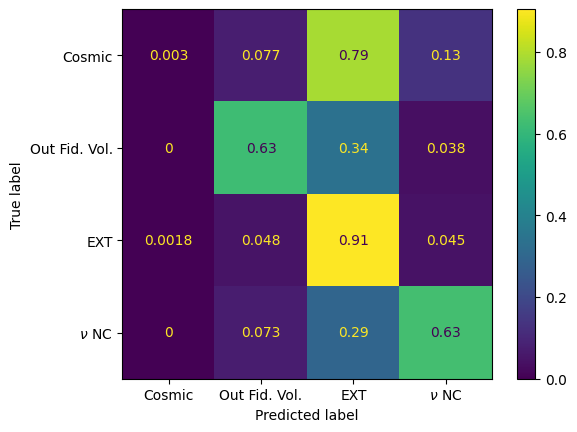

In [17]:
# For labelling your confusion matrix
ptype_no_mu_e = [r"Cosmic", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# plot your confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

Clearly Cosmic (MIS_ID) gets mixed up with EXT. They are very similar interactions. I even think they moay overlap, that most of the EXT interactions (when the beam is off) are cosmic muons. 

We can also see that EXT bleeds into all, even the highly distinguishable neutral current neutrino interactions. This I beleive is due to the EXT events having a much greater frequency in our data. That it almost smears it. 

4 -> Mis-ID

5 -> Out Fid.vol

7 -> EXT

31 -> neutrino NC

In [18]:
# Print counts of each category.
print("Counts of each category:")
print(MC_EXT_ML['category'].value_counts())

Counts of each category:
category
7     13551
5      9570
4      5093
31     3707
Name: count, dtype: int64


Plot the importance of your different parameters.

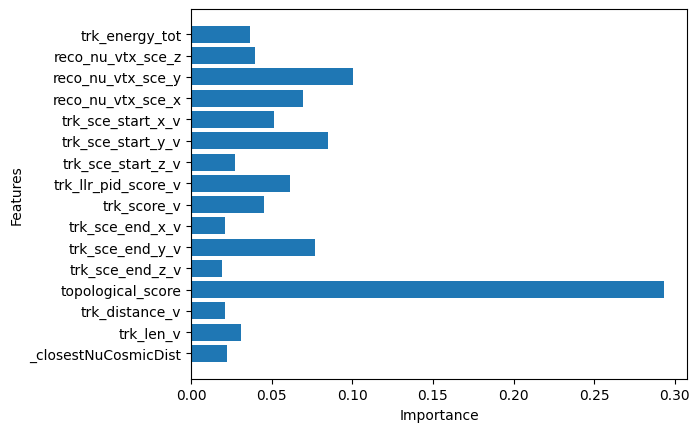

In [19]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(16), importance)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [20]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

In [26]:
def Selections(frame):
    
    num_events_initial = len(frame)
    # Number of signal events before cut.
    num_signal_initial = len(frame[frame["category"] == 21])


    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    
    # Apply selection on dataframe
    frame = frame[selection]

    # Total number of events after cut.
    num_events_final = len(frame)

    # Efficiency calculation.
    #efficiency = num_events_final / num_events_initial
    # New definition of efficiency.
    #efficiency = num_signal_final / num_signal_initial

    # Number of signal events after cut.
    num_signal_final = len(frame[frame["category"] == 21])

    # New efficiency calculation.
    efficiency = num_signal_final / num_signal_initial
    
    # Purity calculation.
    purity = num_signal_final / num_events_final

    print(f"Efficiency of cut: {efficiency:.4f}")
    print(f"Purity of cut: {purity:.4f}")
    
    return frame

## Calls the selection function on the dataframes

In [28]:
MC_EXT = Selections(MC_EXT)
#data_frame = Selections(data)

Efficiency of cut: 1.0000
Purity of cut: 0.4215


Can no longer see real data efficiency

# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [30]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))
print(all_variables_to_plot)


['trk_sce_end_z_v', 'topological_score', 'trk_score_v', 'trk_sce_start_z_v', 'trk_mcs_muon_mom_v', '_closestNuCosmicDist', 'reco_nu_vtx_sce_x', 'category', 'trk_sce_start_x_v', 'trk_range_muon_mom_v', 'reco_nu_vtx_sce_z', 'trk_sce_start_y_v', 'trk_llr_pid_score_v', 'trk_energy_tot', 'trk_len_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'reco_nu_vtx_sce_y', 'trk_distance_v']


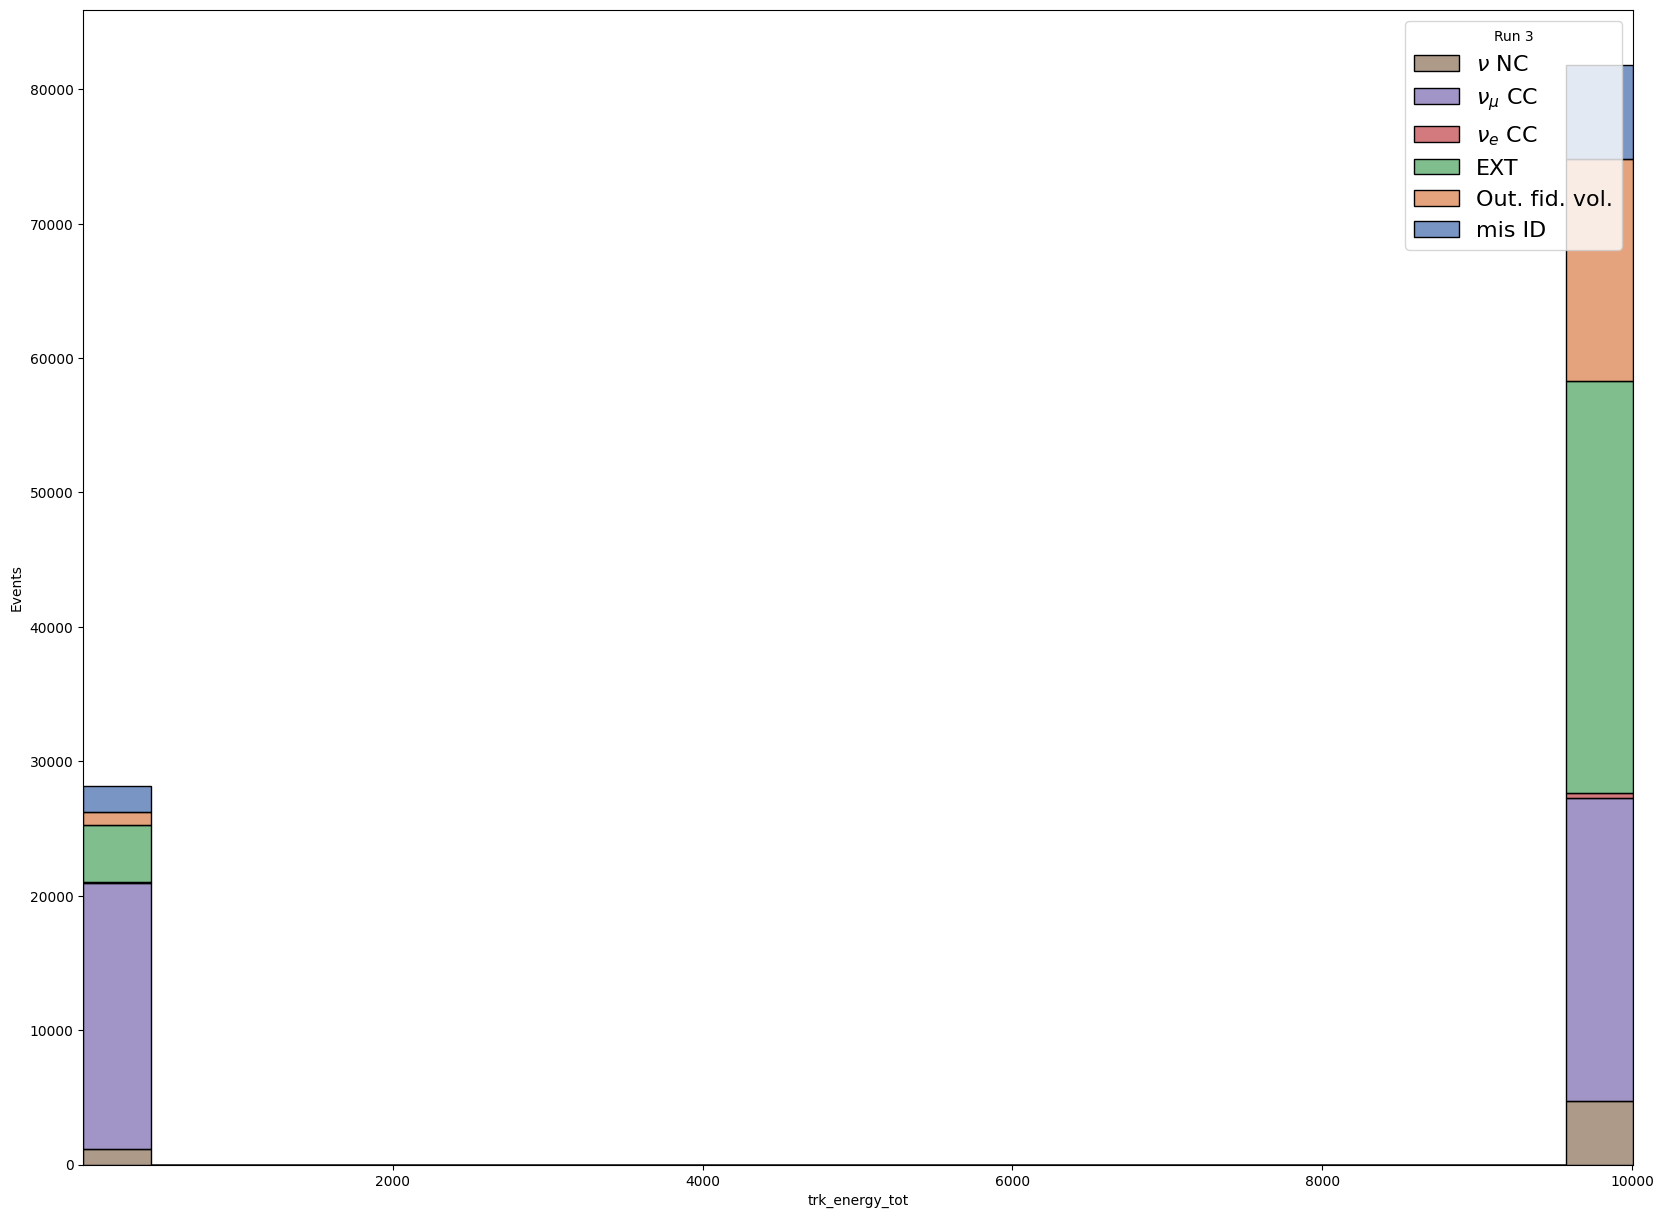

In [31]:
# Simple histogram plot of one variable.
BIN = 23
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
i.set(xlabel='trk_energy_tot', ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
plt.show(i)

In [32]:
def plot_all_histograms(df, variables, title_cut, BIN=70, figsize=(20, 30)):
    """Plot histograms for all specified variables in the dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    variables (list): List of variable names (columns) to plot.
    bins (int): Number of bins for the histograms. Default is 23.
    figsize (tuple): Size of the figure. Default is (20, 15).
    """
    n_vars = len(variables)
    n_cols = 2
    n_rows = (n_vars + n_cols - 1) // n_cols

    plt.figure(figsize=figsize)
    for idx, var in enumerate(variables):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        i = sns.histplot(
            data=df, x=var,
            multiple="stack", hue="category",
            palette = 'deep', weights = MC_EXT['weight'],
            bins = BIN, legend = False)
        i.set(xlabel=var, ylabel = "Events")

        #plt.yscale('log') # Not sure what this is for.
        
        plt.xlim([np.min(MC_EXT[var]), np.max(MC_EXT[var])])#

        if idx == 1: # Add legend only to the second subplot.
            plt.legend(title=title_cut,fontsize=16, loc='upper right',
                       labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
    
    plt.tight_layout()
    plt.show(i)

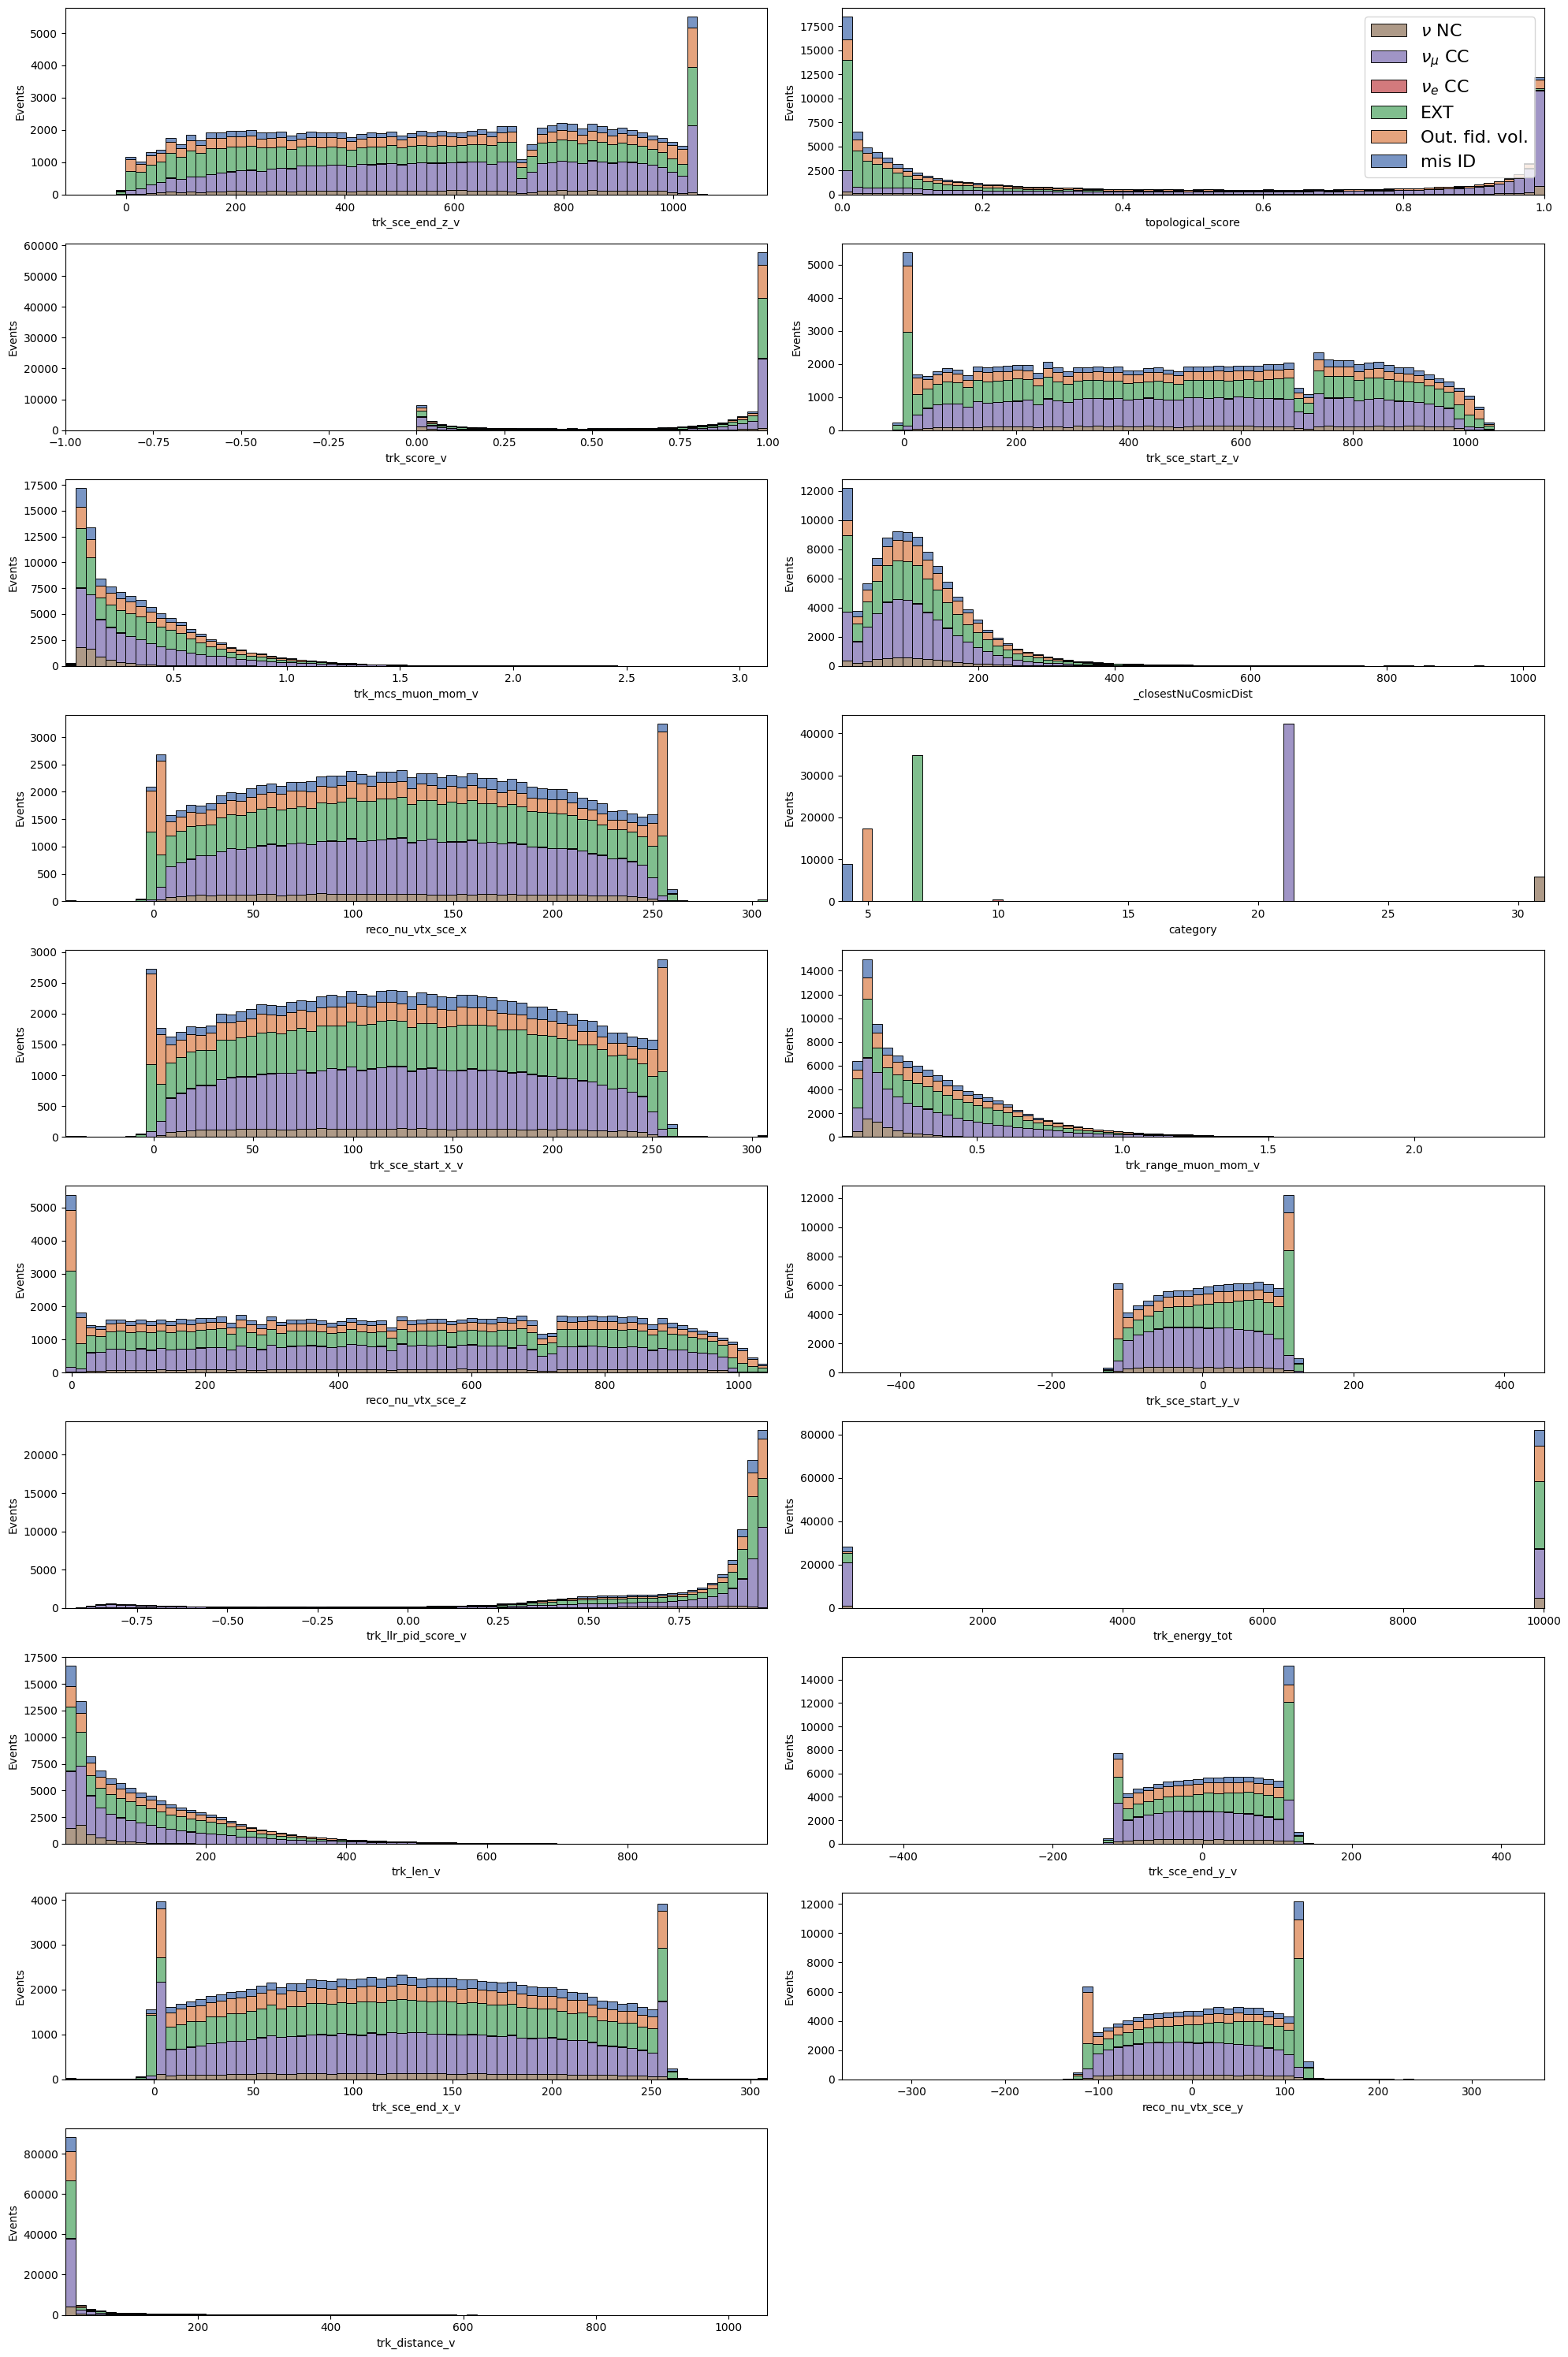

In [33]:
plot_all_histograms(MC_EXT, all_variables_to_plot, "", BIN = 70)

We can see the first selection/cut in ```trk_distance_v``` is unphyiscal and doesn't have any effect. Also that the category variable plot is pointless.

In [34]:
# Removing variable 'category' from list.
# all_variables_to_plot.remove('category')
# No longer doing this as I will use the category variable for finding purity in the plots.
print(all_variables_to_plot)

['trk_sce_end_z_v', 'topological_score', 'trk_score_v', 'trk_sce_start_z_v', 'trk_mcs_muon_mom_v', '_closestNuCosmicDist', 'reco_nu_vtx_sce_x', 'category', 'trk_sce_start_x_v', 'trk_range_muon_mom_v', 'reco_nu_vtx_sce_z', 'trk_sce_start_y_v', 'trk_llr_pid_score_v', 'trk_energy_tot', 'trk_len_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'reco_nu_vtx_sce_y', 'trk_distance_v']


It is suggested to make a cut reducing total track energy to be less than a couple GeV, as from the plot we can see that most values larger than this are not muon neutrino CC interactions, they are background.

In [104]:
# New selection function for new selection.
def Selections_trk_energy_tot(frame):
    """
    Apply selection cut on dataframe based on track energy total. Cutting all above 1 GeV.

    Calculates and prints efficiency and purity of the cut.
    """
    
    # Total number of events before cut. 
    num_events_initial = len(frame)
    # Number of signal events before cut.
    num_signal_initial = len(frame[frame["category"] == 21])

    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    selection = selection & (trk_energy_tot < 2.5)
    
    # Apply selection on dataframe
    frame = frame[selection]

    # Total number of events after cut.
    num_events_final = len(frame)

    # Efficiency calculation.
    #efficiency = num_events_final / num_events_initial
    # New definition of efficiency.

    # Number of signal events after cut.
    num_signal_final = len(frame[frame["category"] == 21])

    # New efficiency calculation.
    efficiency = num_signal_final / num_signal_initial

    # Purity calculation.
    purity = num_signal_final / num_events_final

    print(f"Efficiency of cut: {efficiency:.4f}")
    print(f"Purity of cut: {purity:.4f}")

    return frame

In [105]:
# Making the cut in the trk_energy_tot.
MC_EXT_cut_trk_energy_tot = Selections_trk_energy_tot(MC_EXT)
#data_frame_cut_trk_energy_tot = Selections_trk_energy_tot(data_frame)

Efficiency of cut: 0.4619
Purity of cut: 0.7310


We can see here that the efficiencies for the Monte Carlo and external data (MC_EXT) and the real data (data_frame) are similar, which is good.

Purity of 0 for the real data (data_frame) is ok as there are no labels yet.

# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

I will now try a cut on topological_score as from the graph it seems perfect, very split.

I will first try for above 0.5.

In [39]:
# New selection function for new selection.
# Selection regarding topological score.
def Selections_top_score(frame):
    """
    Apply selection cut on dataframe based on topological score.

    Calculates and prints efficiency and purity of the cut.
    """
    
    # Total number of events before cut. 
    num_events_initial = len(frame)
    # Number of signal events before cut.
    num_signal_initial = len(frame[frame["category"] == 21])

    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    selection = selection & (0.6 < topological) & (topological < 1)
    
    # Apply selection on dataframe
    frame = frame[selection]

    # Total number of events after cut.
    num_events_final = len(frame)

    # Efficiency calculation.
    #efficiency = num_events_final / num_events_initial
    # New definition of efficiency.

    # Number of signal events after cut.
    num_signal_final = len(frame[frame["category"] == 21])

    # New efficiency calculation.
    efficiency = num_signal_final / num_signal_initial

    # Purity calculation.
    purity = num_signal_final / num_events_final

    print(f"Efficiency of cut: {efficiency:.4f}")
    print(f"Purity of cut: {purity:.4f}")

    return frame

In [40]:
# Making the cut in the topological_score.
MC_EXT_cut_top_score = Selections_top_score(MC_EXT)
#data_frame_cut_top_score = Selections_top_score(data_frame)

Efficiency of cut: 0.6155
Purity of cut: 0.7122


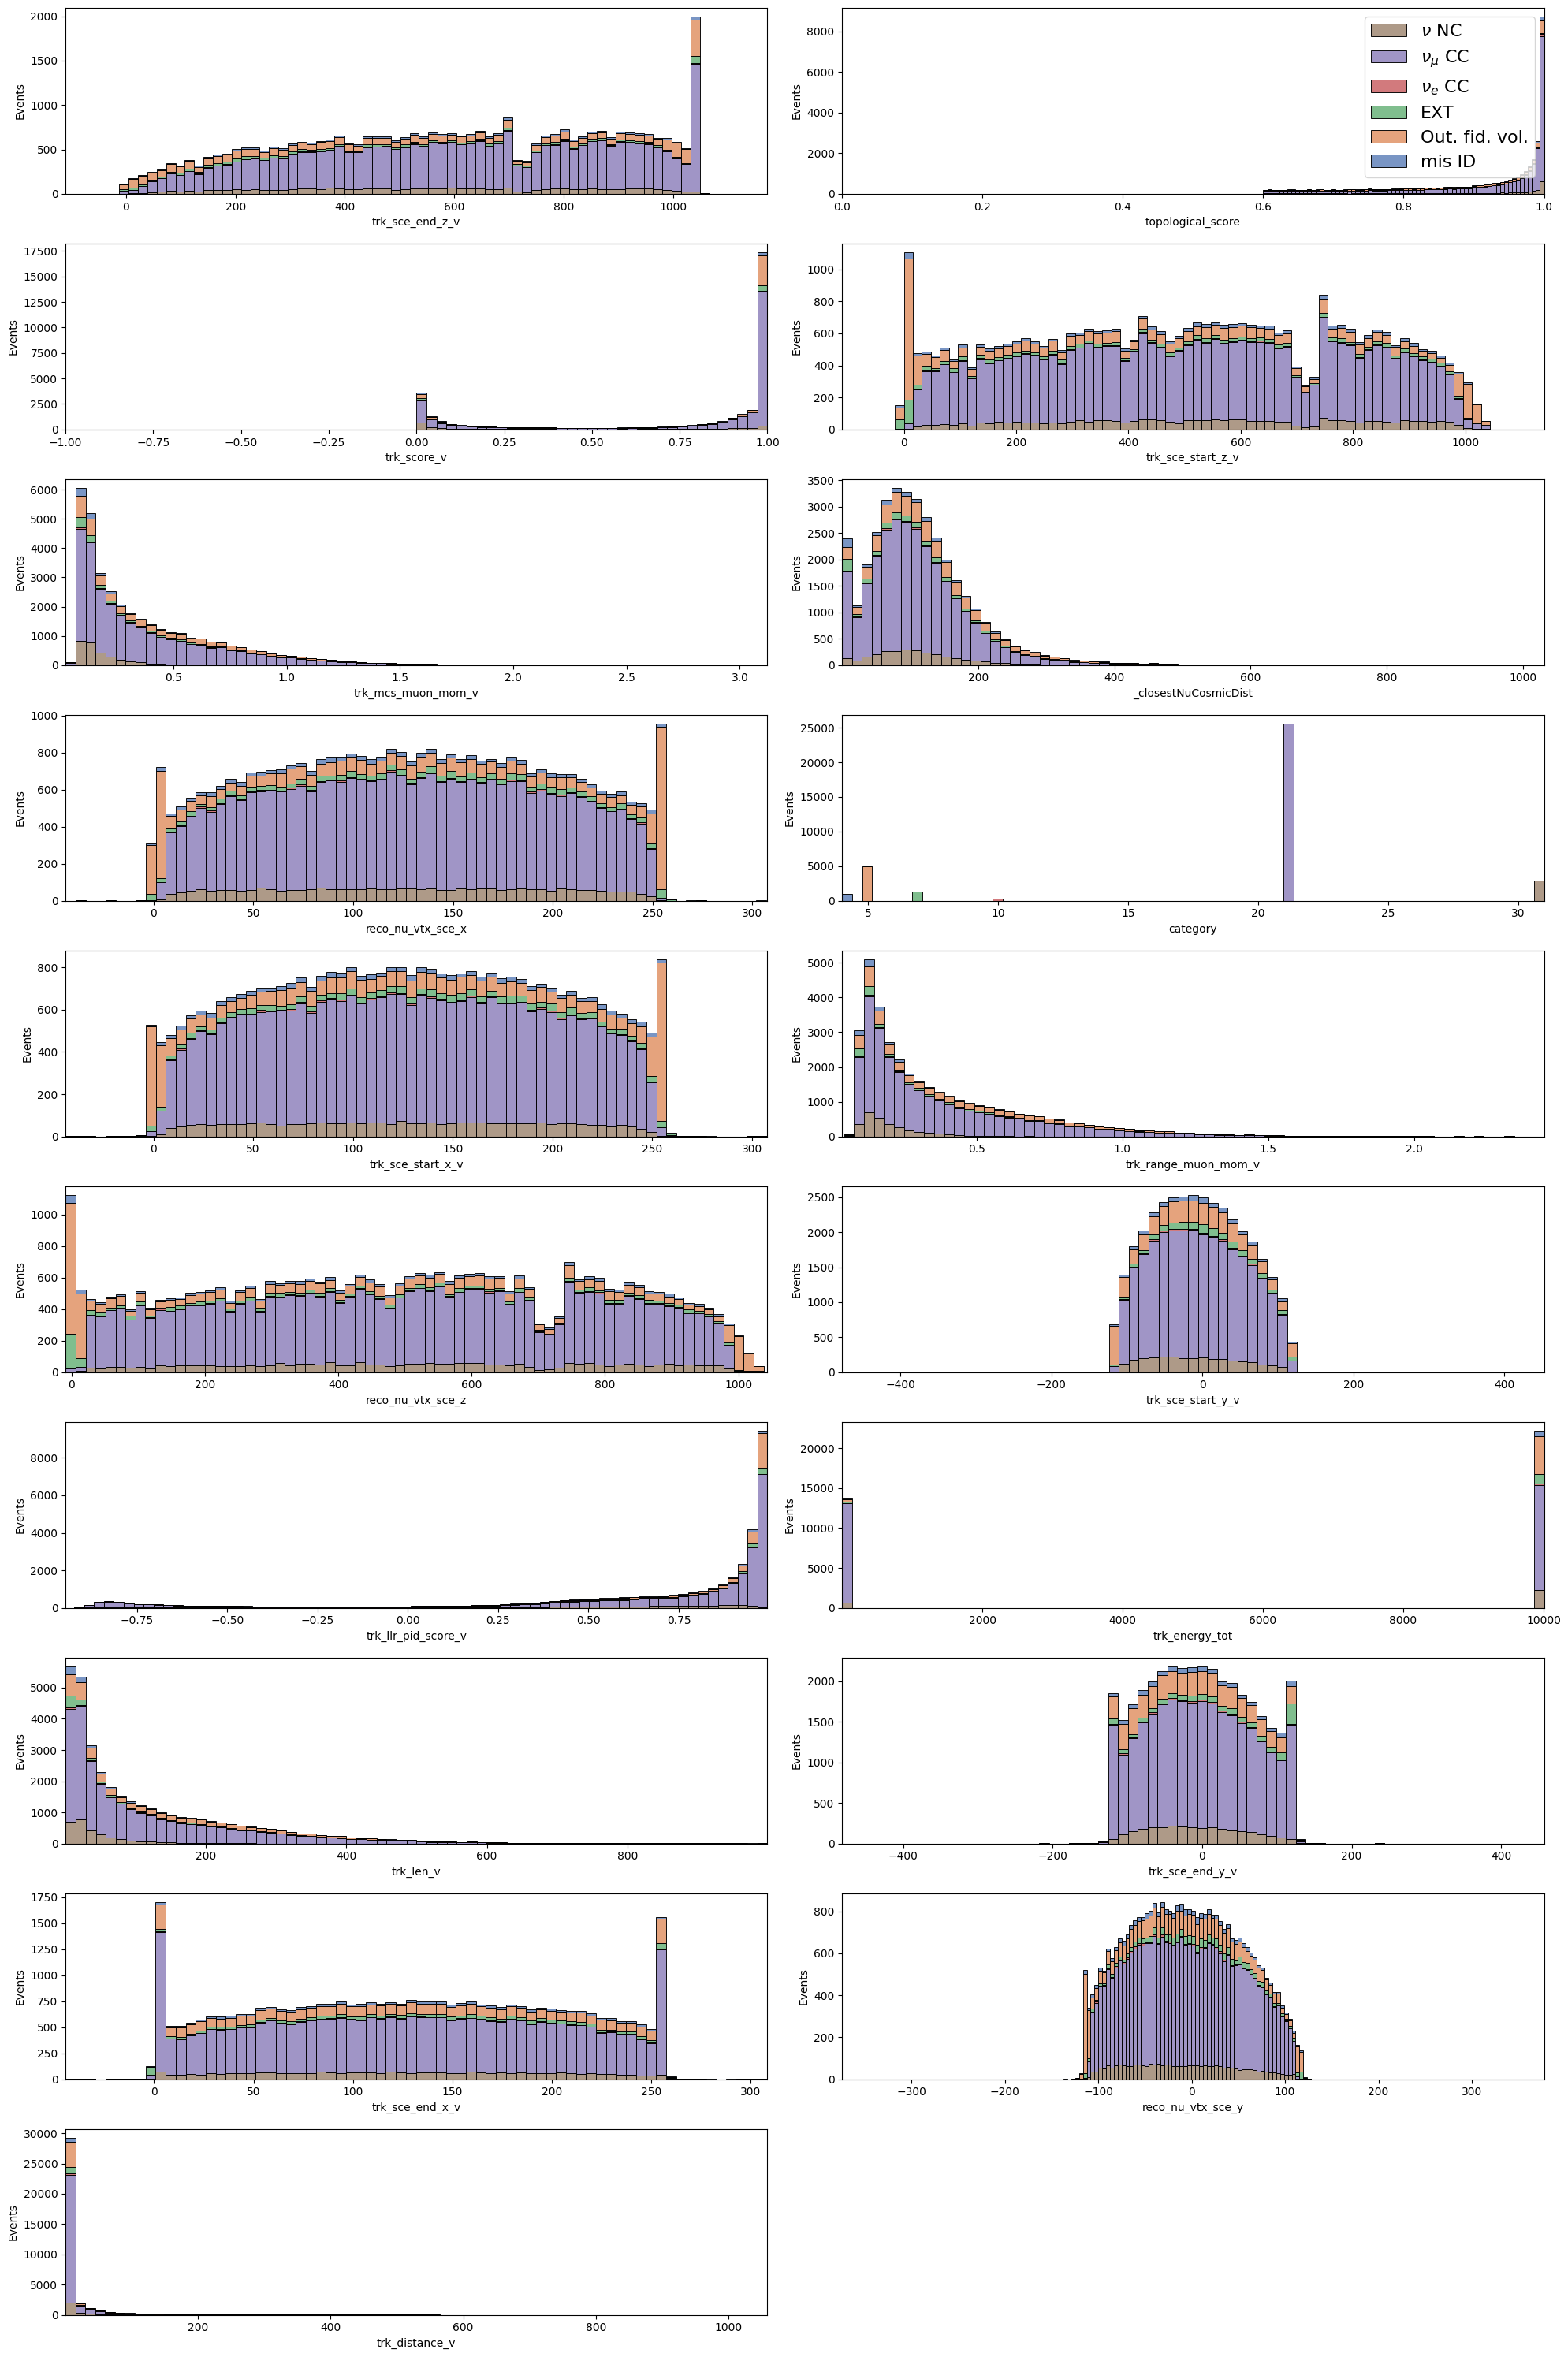

In [41]:
plot_all_histograms(MC_EXT_cut_top_score, all_variables_to_plot, "", BIN = 70)

Keeping the topological score cut I will now apply other cuts to different variables.

In [65]:
# New selection function for new selection.
# Selection regarding topological score alongside others.
def Selections_top_score_add(frame):
    """
    Apply selection cut on dataframe based on topological score and other variables:
    - trk_start
    - reco.

    Calculates and prints efficiency and purity of the cut.
    """
    
    # Total number of events before cut. 
    num_events_initial = len(frame)
    # Number of signal events before cut.
    num_signal_initial = len(frame[frame["category"] == 21])

    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    # Topological score cut.
    selection = selection & (0.5 < topological) & (topological < 1)
    # Track start cut.
    selection = selection & (trk_start_z_v > 20) & (trk_start_z_v < 980)
    selection = selection & (trk_start_x_v > 20) & (trk_start_x_v < 240)
    selection = selection & (trk_start_y_v > -105) & (trk_start_y_v < 110)
    # reco cut.
    selection = selection & (reco_z > 20) & (reco_z < 980)
    selection = selection & (reco_y > -110) & (reco_y < 110)
    selection = selection & (reco_x > 10) & (reco_x < 250)
    
    # Apply selection on dataframe
    frame = frame[selection]

    # Total number of events after cut.
    num_events_final = len(frame)

    # Efficiency calculation.
    efficiency = num_events_final / num_events_initial
    # New definition of efficiency.

    # Number of signal events after cut.
    num_signal_final = len(frame[frame["category"] == 21])

    # New efficiency calculation.
    efficiency = num_signal_final / num_signal_initial

    # Purity calculation.
    purity = num_signal_final / num_events_final

    print(f"Efficiency of cut: {efficiency:.4f}")
    print(f"Purity of cut: {purity:.4f}")

    return frame

In [66]:
# Making the cut in the topological_score plus others.
MC_EXT_cut_top_score_add = Selections_top_score_add(MC_EXT)
#data_frame_cut_top_score_add = Selections_top_score_add(data_frame)

Efficiency of cut: 0.5835
Purity of cut: 0.8173


In [44]:
# Making the cut in the topological_score plus others.
MC_EXT_cut_top_score_add = Selections_top_score_add(MC_EXT)
#data_frame_cut_top_score_add = Selections_top_score_add(data_frame)

Efficiency of cut: 0.5835
Purity of cut: 0.8173


Used the below plots to help cut.

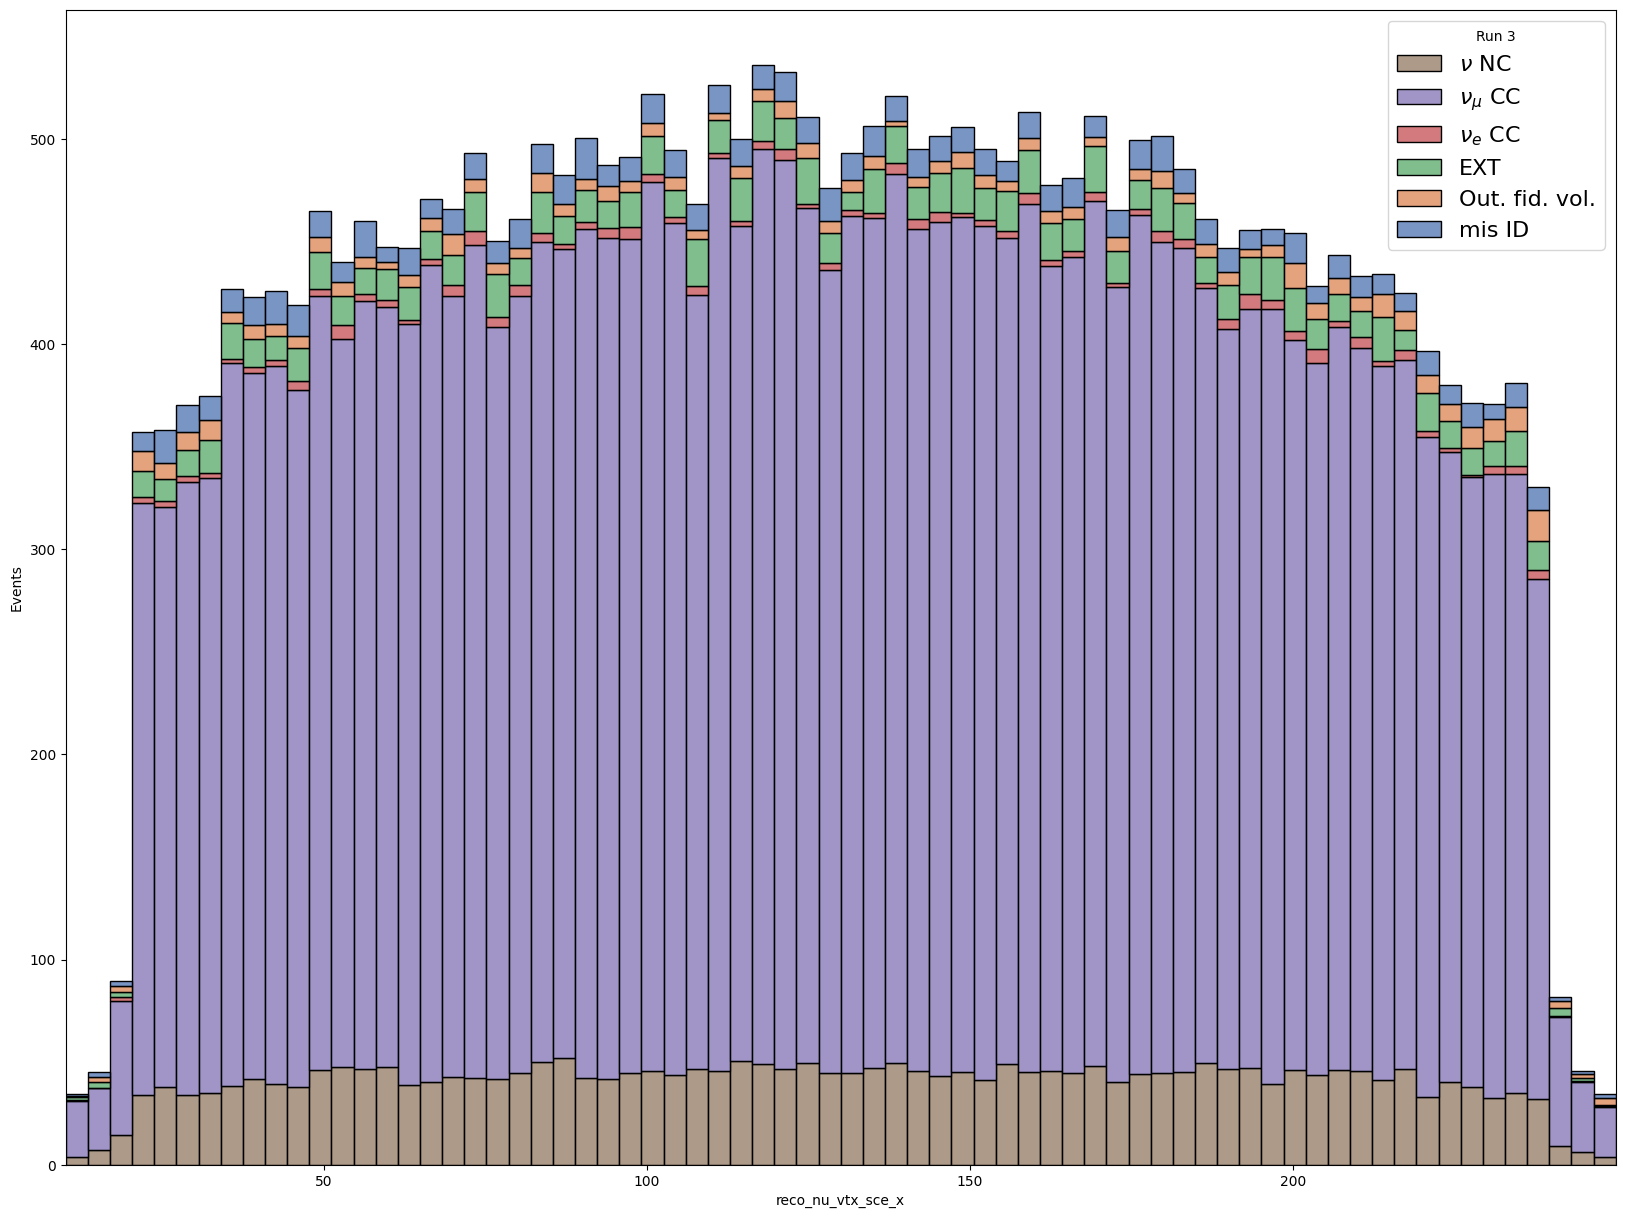

In [45]:
# Simple histogram plot of one variable.
BIN = 70
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT_cut_top_score_add, x='reco_nu_vtx_sce_x', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_cut_top_score_add['weight'], bins = BIN, legend = False)
i.set(xlabel='reco_nu_vtx_sce_x', ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(MC_EXT_cut_top_score_add['reco_nu_vtx_sce_x']), np.max(MC_EXT_cut_top_score_add['reco_nu_vtx_sce_x'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])

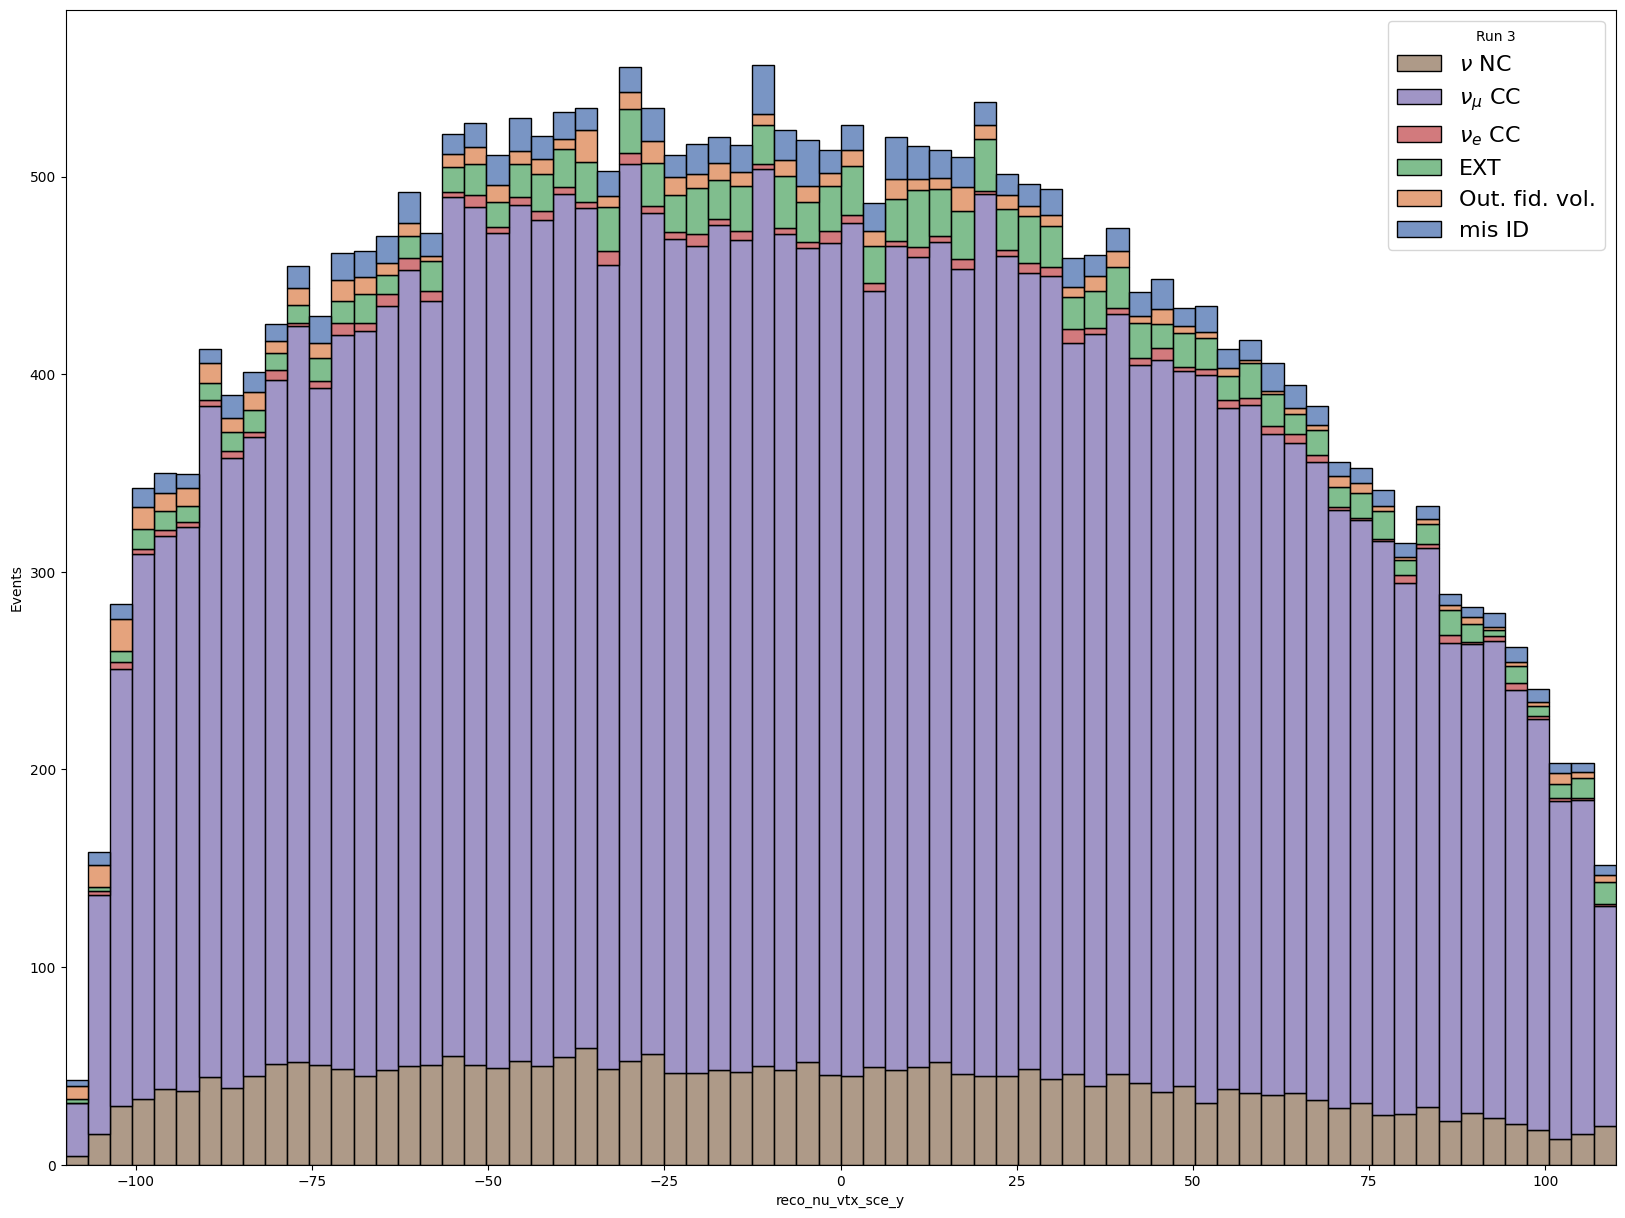

In [46]:
# Simple histogram plot of one variable.
BIN = 70
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT_cut_top_score_add, x='reco_nu_vtx_sce_y', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_cut_top_score_add['weight'], bins = BIN, legend = False)
i.set(xlabel='reco_nu_vtx_sce_y', ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(MC_EXT_cut_top_score_add['reco_nu_vtx_sce_y']), np.max(MC_EXT_cut_top_score_add['reco_nu_vtx_sce_y'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])

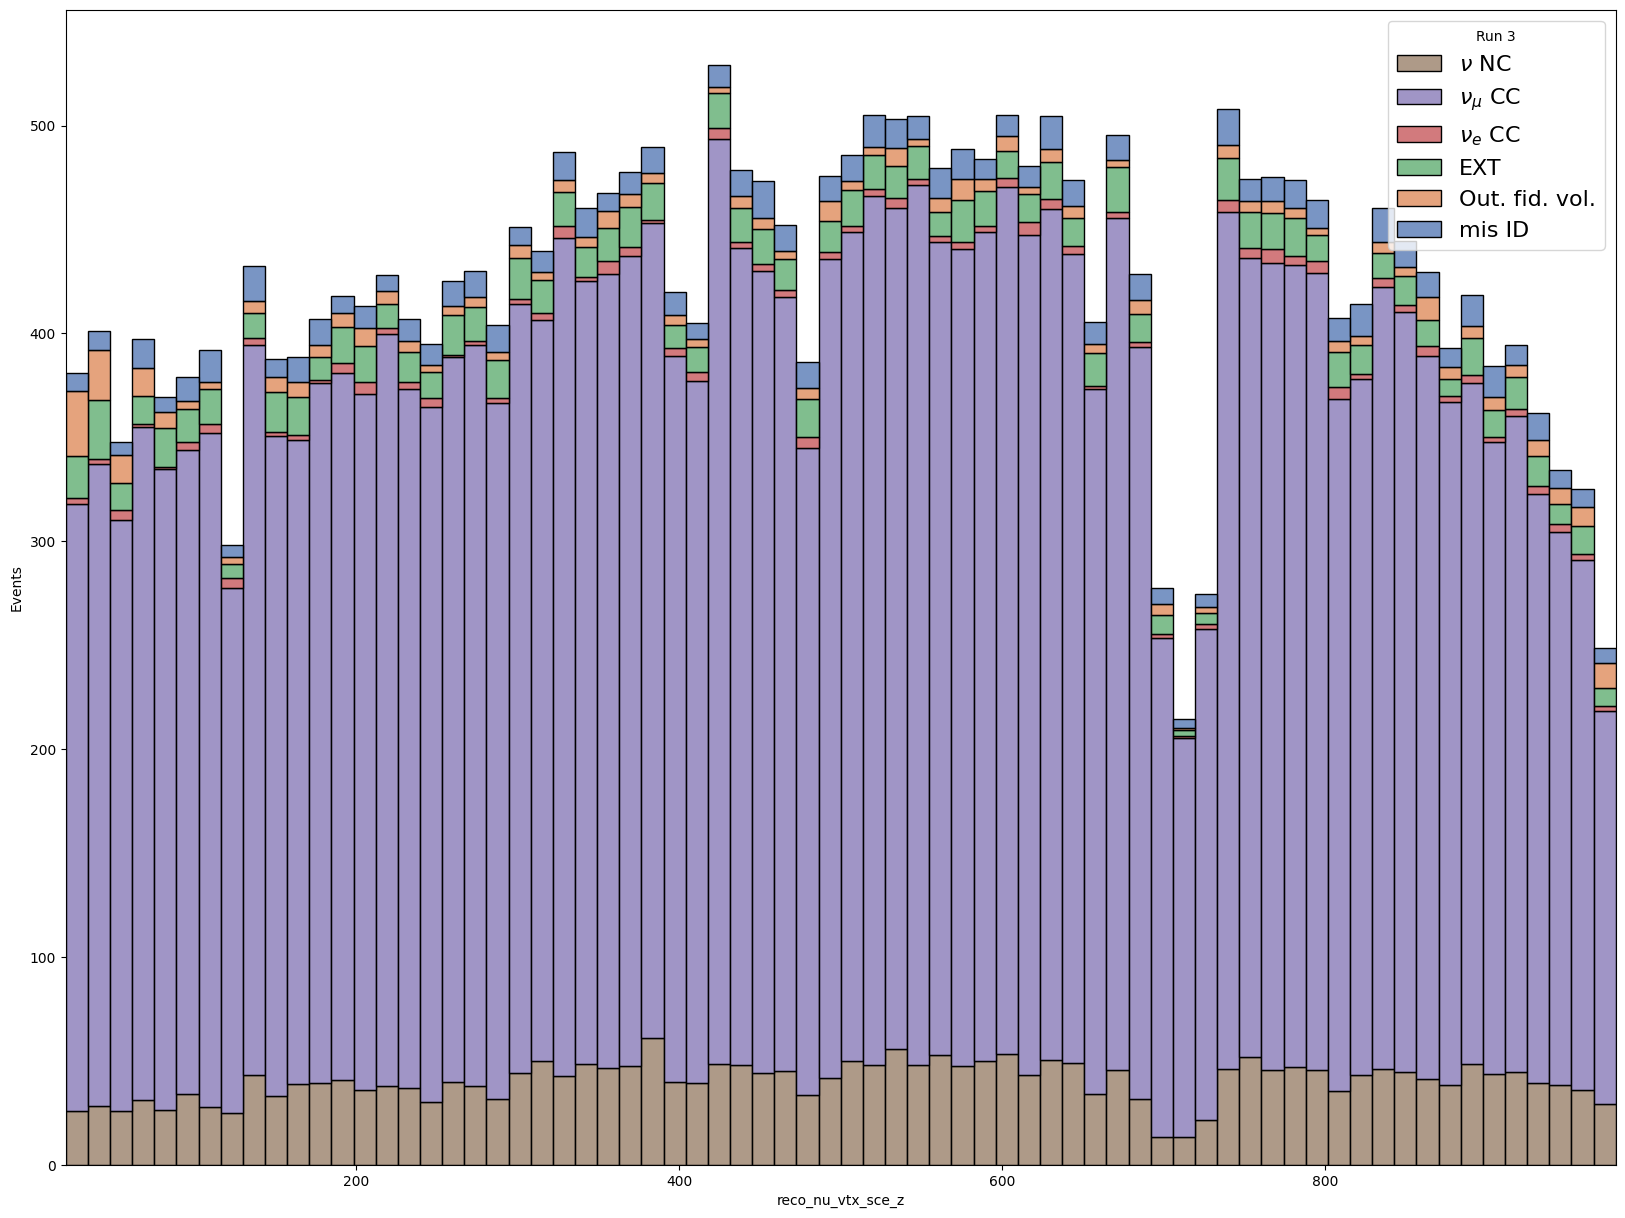

In [47]:
# Simple histogram plot of one variable.
BIN = 70
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT_cut_top_score_add, x='reco_nu_vtx_sce_z', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_cut_top_score_add['weight'], bins = BIN, legend = False)
i.set(xlabel='reco_nu_vtx_sce_z', ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(MC_EXT_cut_top_score_add['reco_nu_vtx_sce_z']), np.max(MC_EXT_cut_top_score_add['reco_nu_vtx_sce_z'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
plt.show(i)

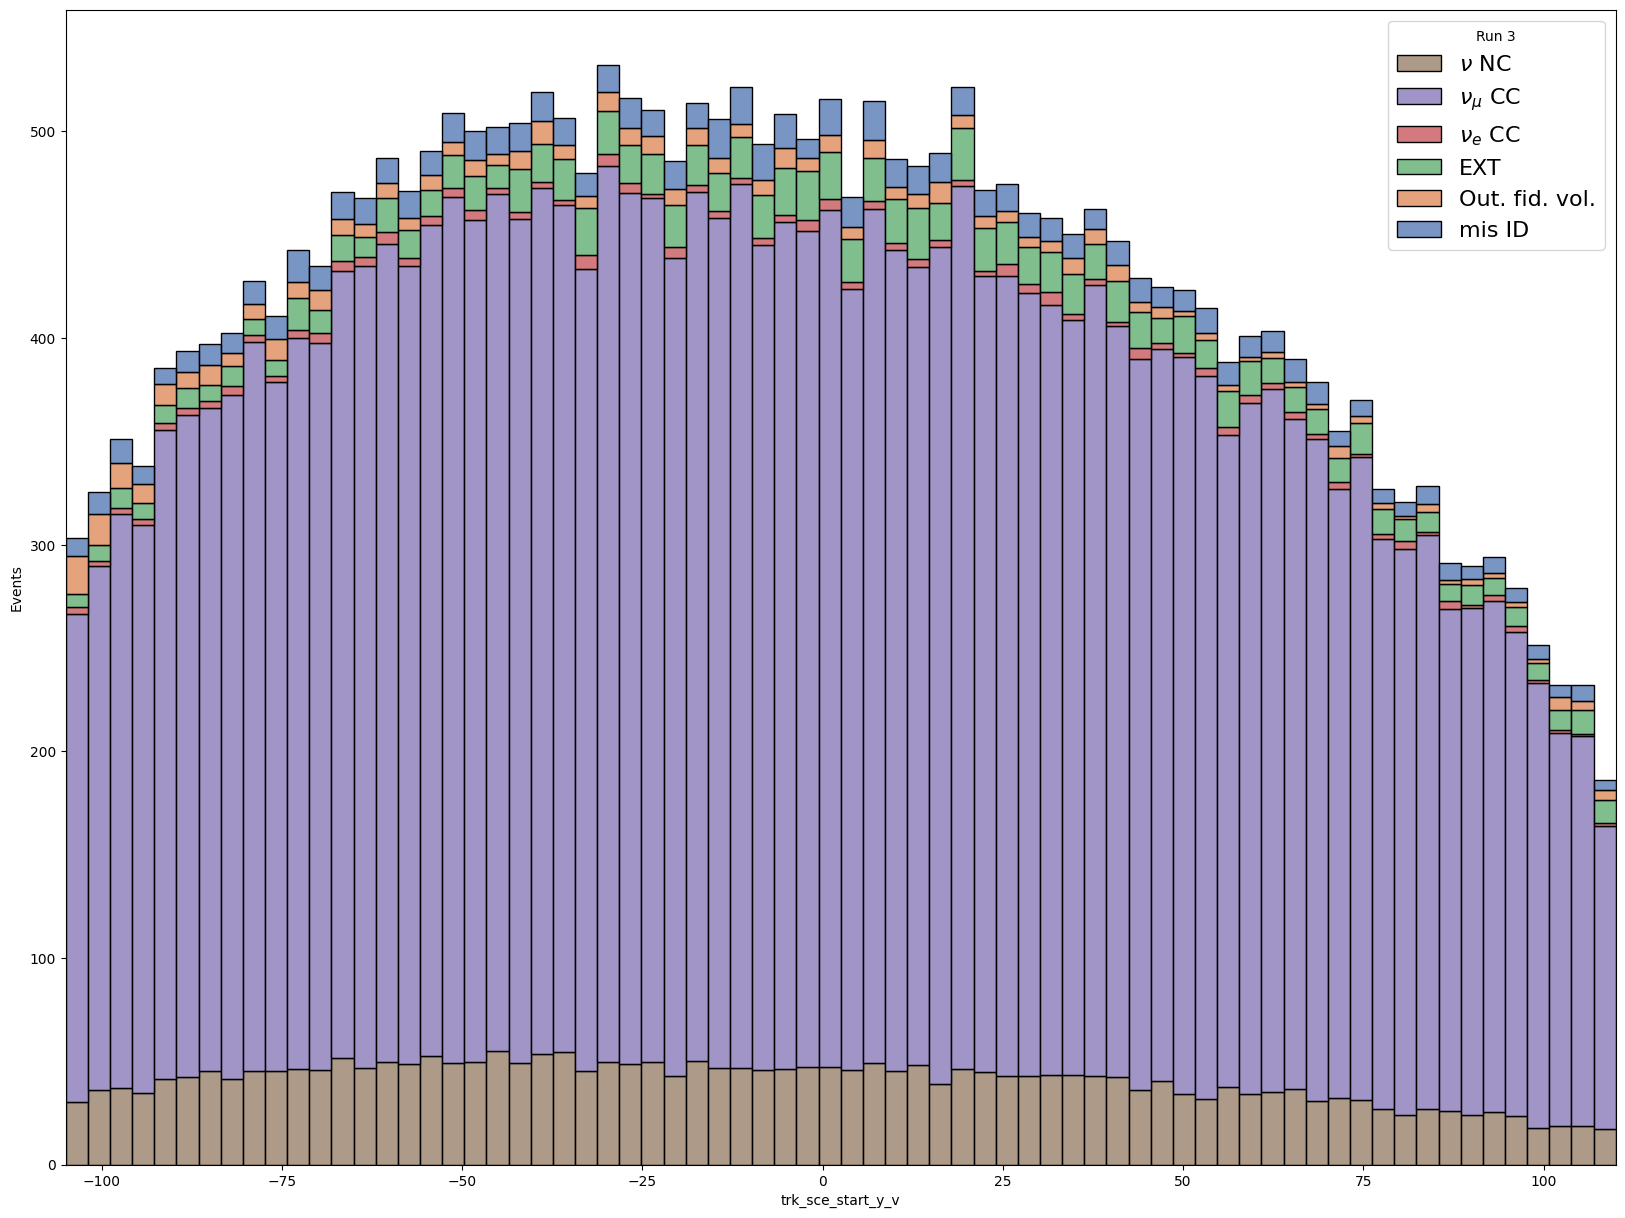

In [48]:
# Simple histogram plot of one variable.
BIN = 70
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT_cut_top_score_add, x='trk_sce_start_y_v', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_cut_top_score_add['weight'], bins = BIN, legend = False)
i.set(xlabel='trk_sce_start_y_v', ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(MC_EXT_cut_top_score_add['trk_sce_start_y_v']), np.max(MC_EXT_cut_top_score_add['trk_sce_start_y_v'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
plt.show(i)

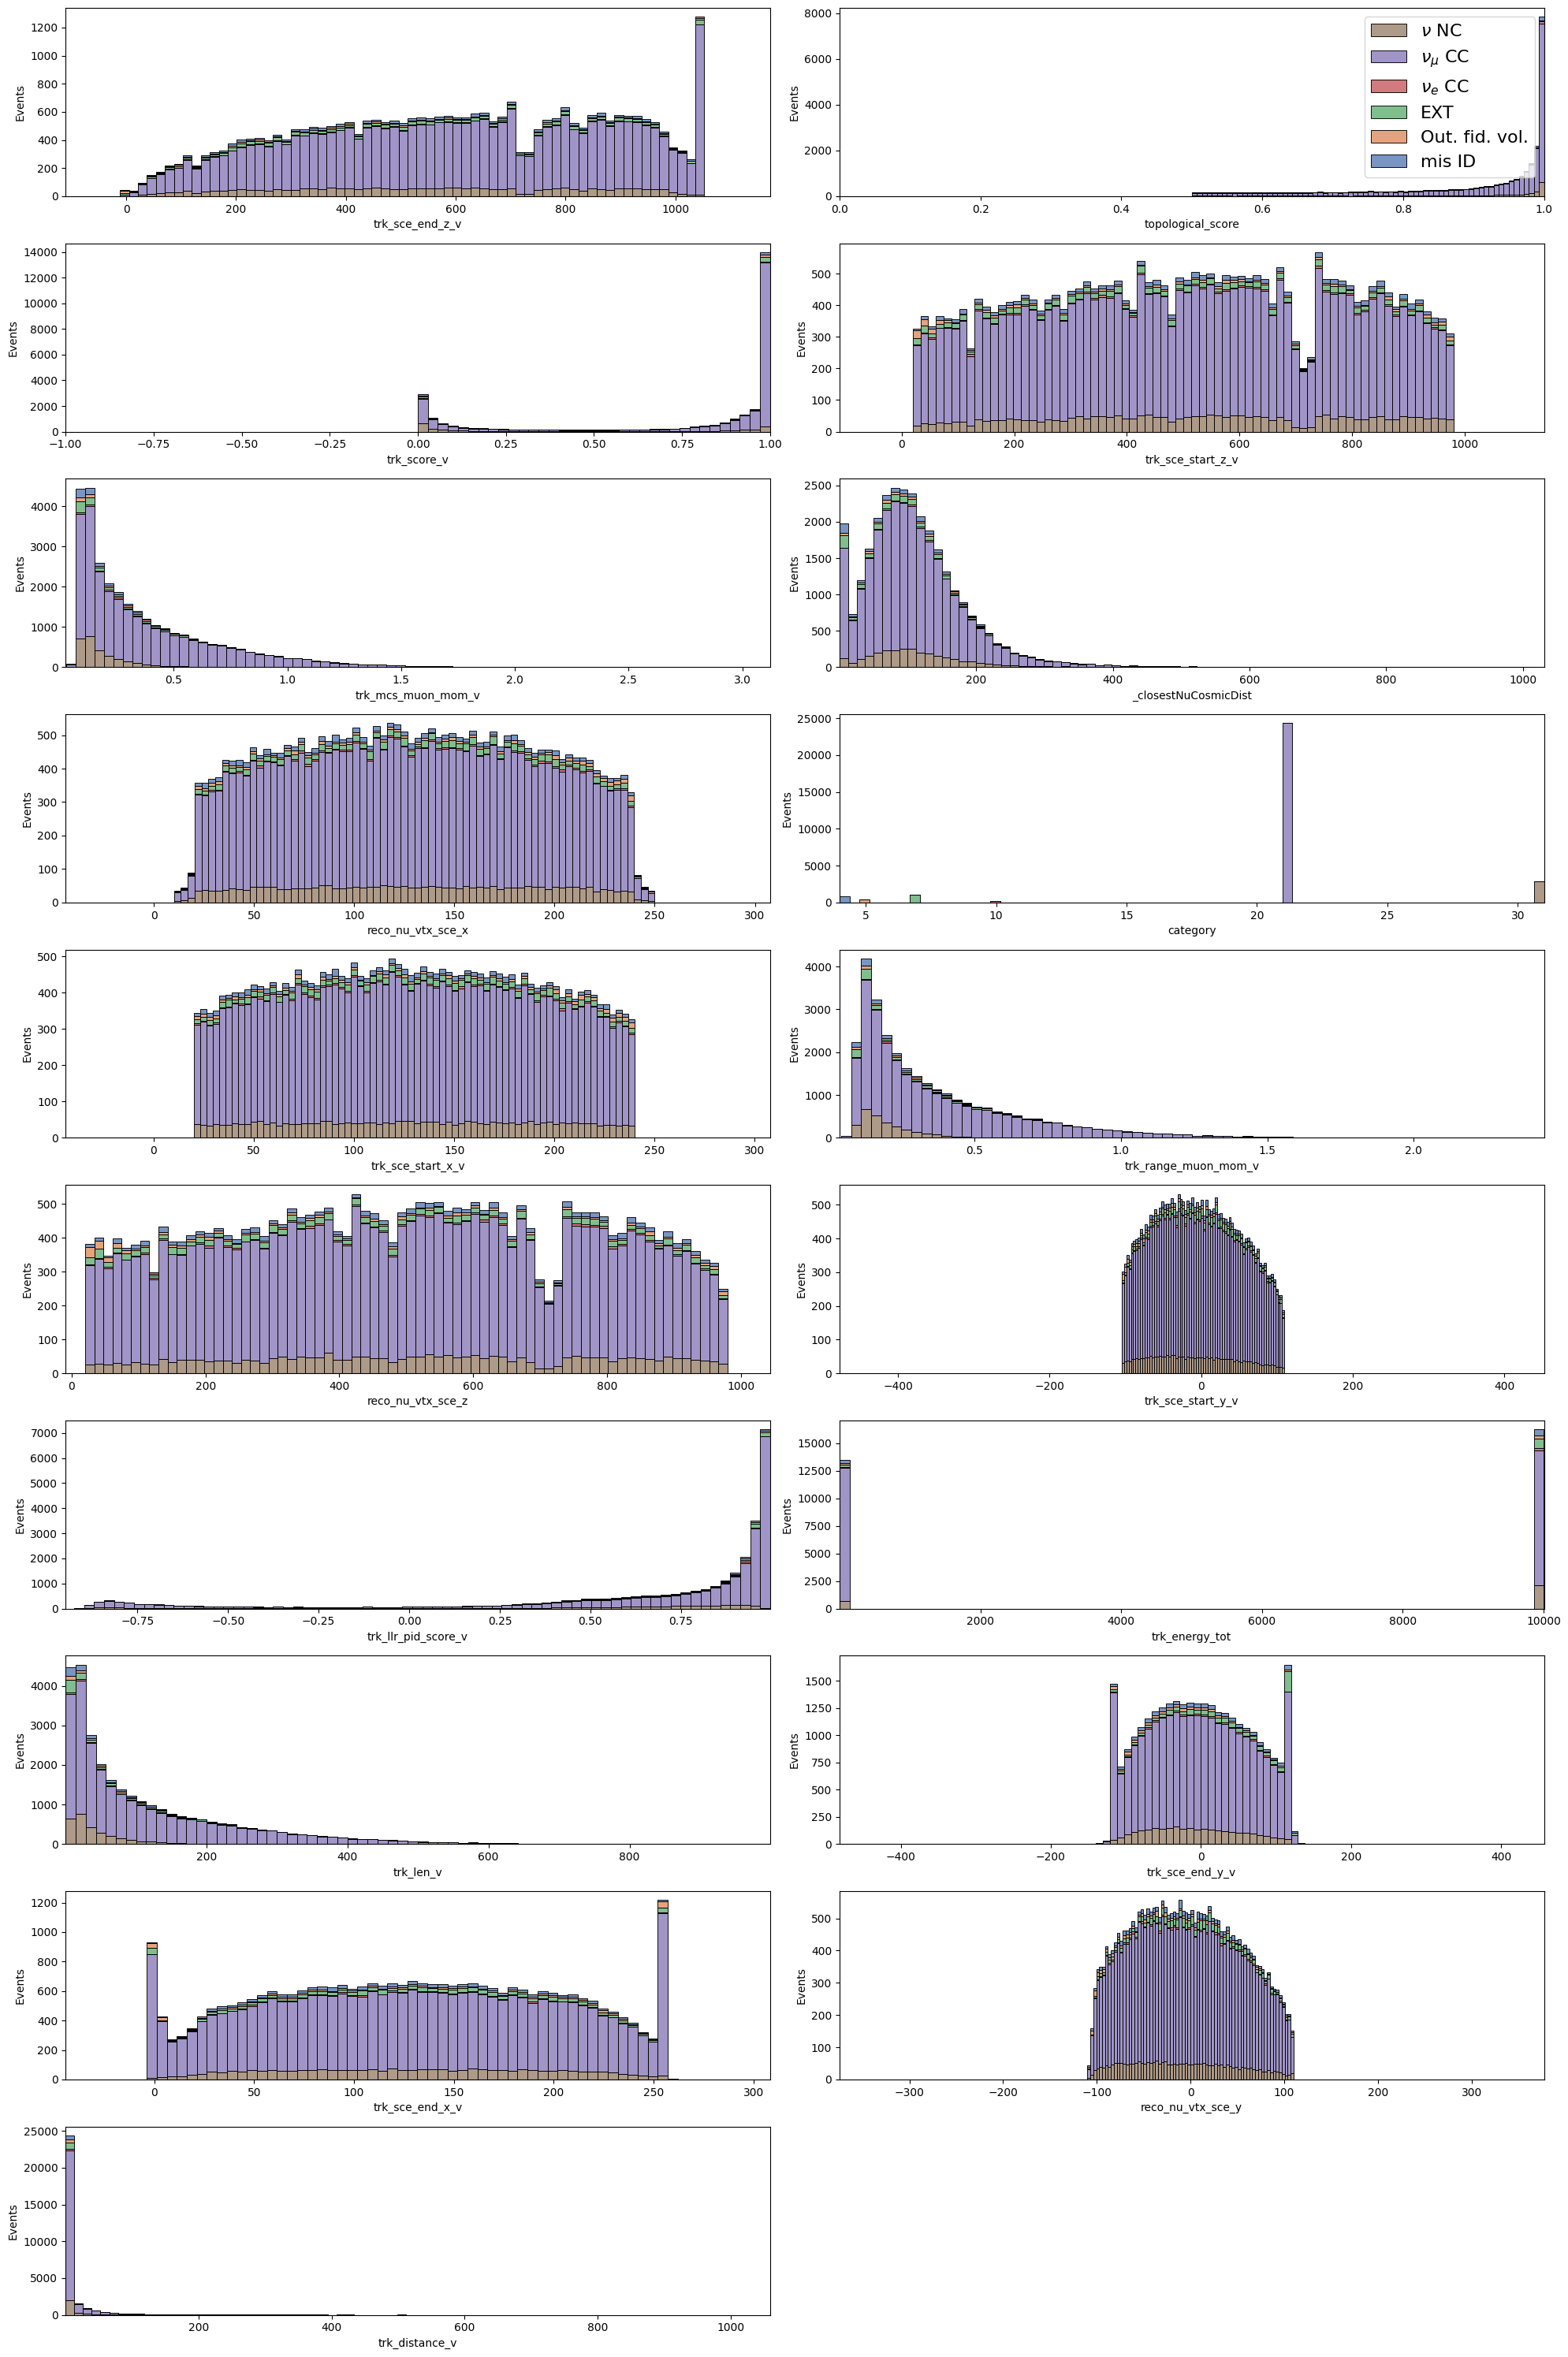

In [67]:
plot_all_histograms(MC_EXT_cut_top_score_add, all_variables_to_plot, "", BIN = 70)

From the above the plots we can see we've cut so much of the the external events.

Could cut energy energy here too.

In [113]:
# New selection function for new selection.
# Selection regarding topological score alongside others.
def Selections_top_score_energy_add(frame):
    """
    Apply selection cut on dataframe based on topological score, trk_energy_tot and other variables:
    - trk_start
    - reco.

    Calculates and prints efficiency and purity of the cut.
    """
    
    # Total number of events before cut. 
    num_events_initial = len(frame)
    # Number of signal events before cut.
    num_signal_initial = len(frame[frame["category"] == 21])

    # Basic variables present in dataframe 
    trk_start_x_v = frame['trk_sce_start_x_v']        # cm
    trk_start_y_v = frame['trk_sce_start_y_v']        # cm
    trk_start_z_v = frame['trk_sce_start_z_v']        # cm
    trk_end_x_v = frame['trk_sce_end_x_v']            # cm
    trk_end_y_v = frame['trk_sce_end_y_v']            # cm
    trk_end_z_v = frame['trk_sce_end_z_v']            # cm
    reco_x = frame['reco_nu_vtx_sce_x']               # cm
    reco_y = frame['reco_nu_vtx_sce_y']               # cm
    reco_z = frame['reco_nu_vtx_sce_z']               # cm
    topological = frame['topological_score']          # N/A
    trk_score_v = frame['trk_score_v']                # N/A
    trk_dis_v = frame['trk_distance_v']               # cm
    trk_len_v = frame['trk_len_v']                    # cm
    trk_energy_tot = frame['trk_energy_tot']          # GeV 
    
    
    
    # select the conditions you want to apply, here is an initial condition to get you started.
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    # Topological score cut.
    selection = selection & (0.5 < topological) & (topological < 1)
    # Track start cut.
    selection = selection & (trk_start_z_v > 20) & (trk_start_z_v < 980)
    selection = selection & (trk_start_x_v > 20) & (trk_start_x_v < 240)
    selection = selection & (trk_start_y_v > -105) & (trk_start_y_v < 110)
    # reco cut.
    selection = selection & (reco_z > 20) & (reco_z < 980)
    selection = selection & (reco_y > -110) & (reco_y < 110)
    selection = selection & (reco_x > 10) & (reco_x < 250)
    # trk_energy_tot cut.
    selection = selection & (trk_energy_tot < 2.5) & (trk_energy_tot > 0)
    
    # Apply selection on dataframe
    frame = frame[selection]

    # Total number of events after cut.
    num_events_final = len(frame)

    # Efficiency calculation.
    #efficiency = num_events_final / num_events_initial
    # New definition of efficiency.

    # Number of signal events after cut.
    num_signal_final = len(frame[frame["category"] == 21])

    # New efficiency calculation.
    try:
        efficiency = num_signal_final / num_signal_initial
    except ZeroDivisionError:
        efficiency = 0
    # Using try except to avoid zero division error for real data_frame.

    # Purity calculation.
    purity = num_signal_final / num_events_final

    print(f"Efficiency of cut: {efficiency:.4f}")
    print(f"Purity of cut: {purity:.4f}")

    return frame

In [114]:
# Making the cut in the topological_score, trk_energy_tot plus others.
MC_EXT_cut_top_score_energy_add = Selections_top_score_energy_add(MC_EXT)
data_frame_cut_top_score_energy_add = Selections_top_score_energy_add(data_frame)

Efficiency of cut: 0.2904
Purity of cut: 0.8990
Efficiency of cut: 0.0000
Purity of cut: 0.0000


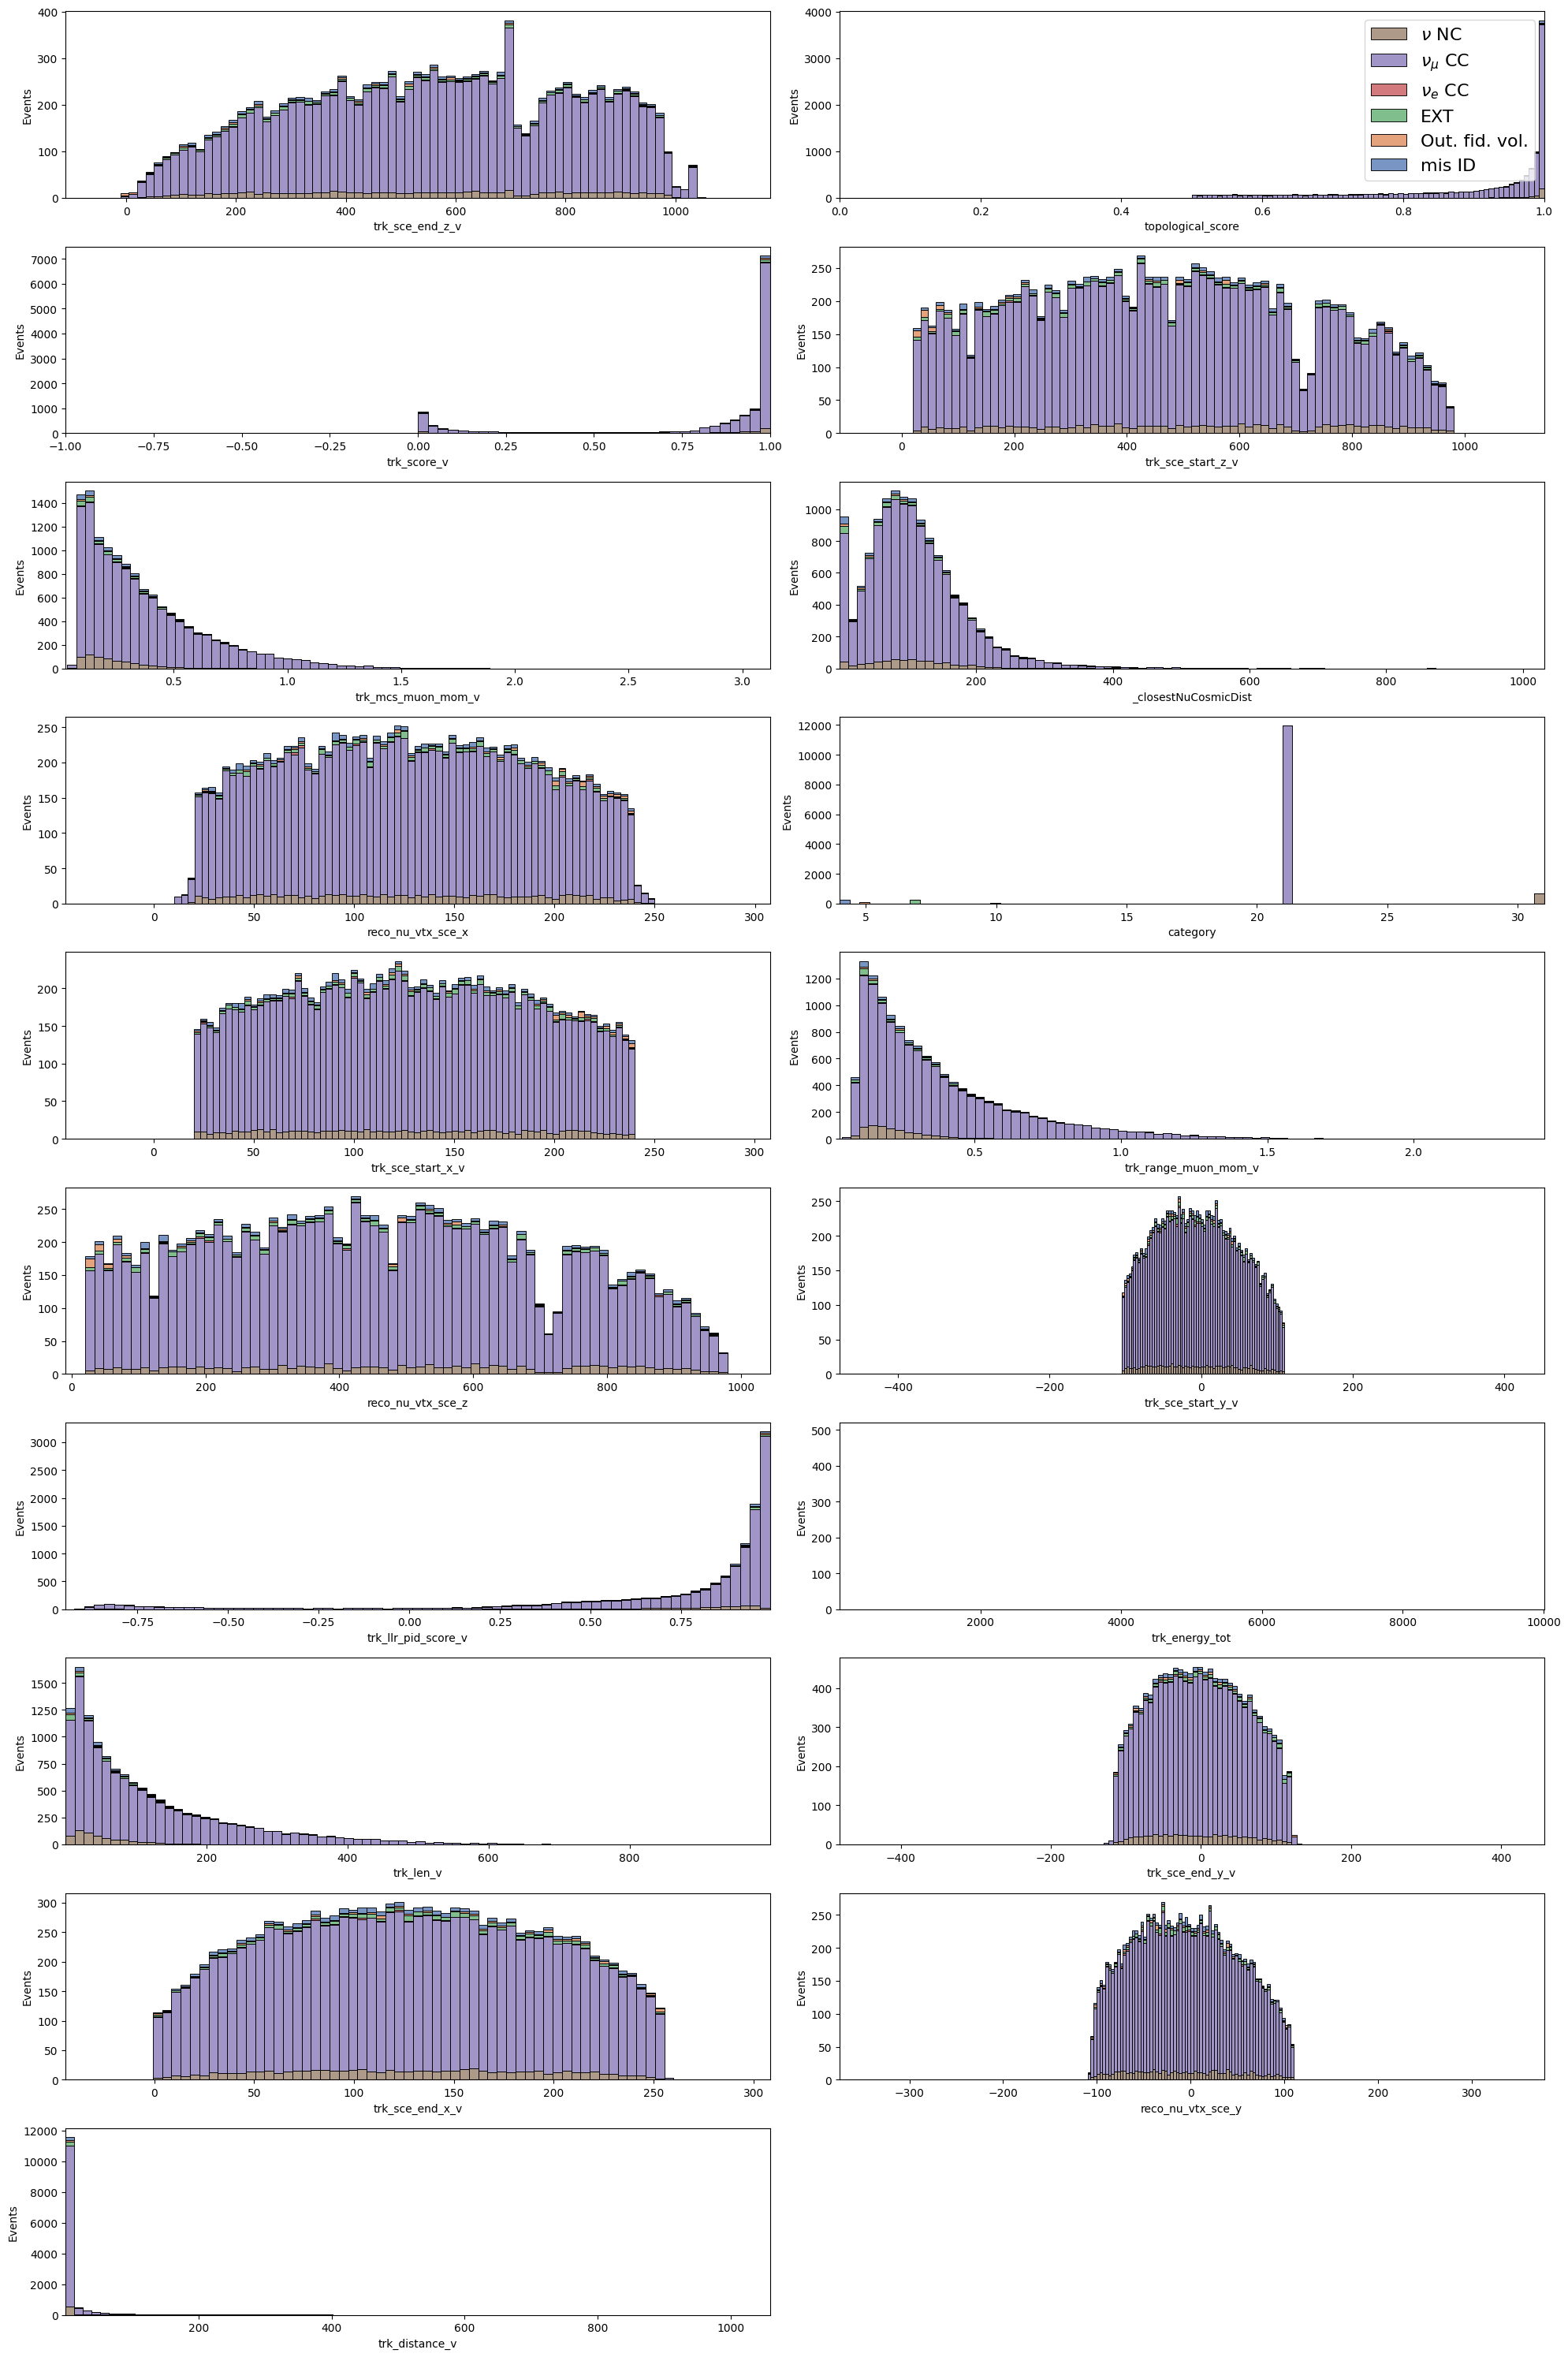

In [115]:
plot_all_histograms(MC_EXT_cut_top_score_energy_add, all_variables_to_plot, "", BIN = 70)

# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

In [62]:
MC_EXT_cut_top_score_energy_add.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,...,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,...,53.900658,36.203041,342.578735,1.164239,0.613618,0.624997,0.000002,1.371928,438.602722,0.607686
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,...,53.900658,36.203041,342.578735,1.164239,0.101568,0.093,0.000002,1.371928,438.602722,0.607686
13,0.278488,75.551727,0.208943,21,0.984373,559.447205,-81.352386,93.415474,0.902821,0.897909,...,165.071518,-101.099983,552.576782,0.888904,0.2855,0.259,0.158957,0.947602,422.767517,0.283484
14,0.278488,27.239777,386.296997,21,0.984373,202.525604,113.942856,176.226593,0.979166,0.486213,...,165.071518,-101.099983,552.576782,0.888904,0.167584,0.13,0.158957,0.947602,422.767517,0.283484
25,116.876312,63.389645,0.633116,21,0.884215,465.989136,-58.62722,82.079384,0.974152,0.926682,...,73.916153,-88.119781,410.201050,0.674289,0.257676,0.229,0.158957,0.741877,467.205078,0.263914
27,119.721243,213.104782,0.7703,21,0.615630,975.01355,-115.7183,148.410889,1.0,0.978642,...,79.323479,51.135880,861.537048,1.261799,0.586865,0.577998,0.158957,1.467931,433.569305,0.622568
28,119.721243,47.916477,1.365335,21,0.615630,905.803589,53.816448,99.981354,0.968874,0.874414,...,79.323479,51.135880,861.537048,1.261799,0.221057,0.195,0.158957,1.467931,433.569305,0.622568
29,119.721243,18.84617,0.666183,21,0.615630,877.033691,60.768612,72.778297,0.699419,0.766718,...,79.323479,51.135880,861.537048,1.261799,0.142789,0.189,0.158957,1.467931,433.569305,0.622568
33,33.621768,349.355042,0.246664,21,0.998728,714.887756,-99.810875,109.170898,1.0,0.987402,...,26.011066,-25.452852,385.042236,1.158893,0.890276,0.874998,0.158957,1.321990,465.101074,0.920382
34,33.621768,16.754335,1.144841,21,0.998728,384.132446,-36.118885,32.539192,0.472771,0.67729,...,26.011066,-25.452852,385.042236,1.158893,0.13607,0.076,0.158957,1.321990,465.101074,0.920382


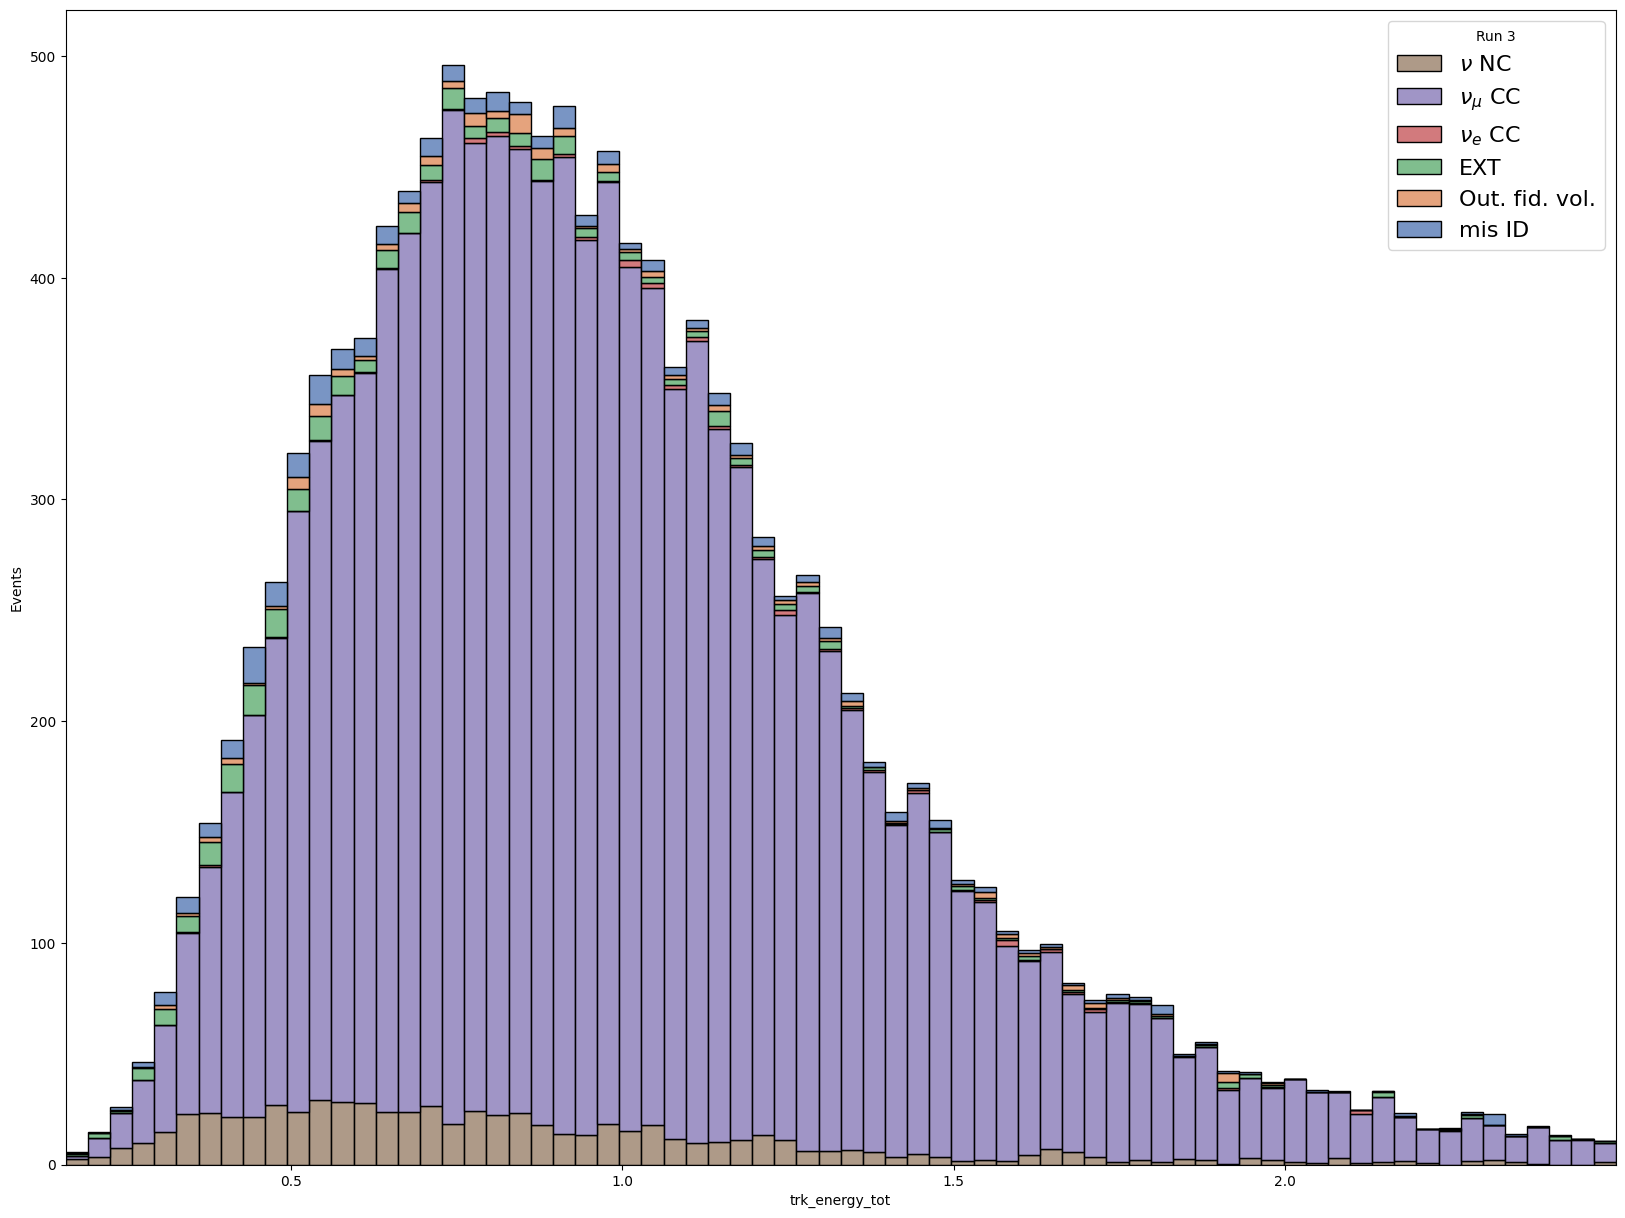

In [116]:
# Simple histogram plot of one variable.
BIN = 70
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT_cut_top_score_energy_add, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_cut_top_score_energy_add['weight'], bins = BIN, legend = False)
i.set(xlabel='trk_energy_tot', ylabel = "Events")

#plt.yscale('log')
plt.xlim([np.min(MC_EXT_cut_top_score_energy_add['trk_energy_tot']), np.max(MC_EXT_cut_top_score_energy_add['trk_energy_tot'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])

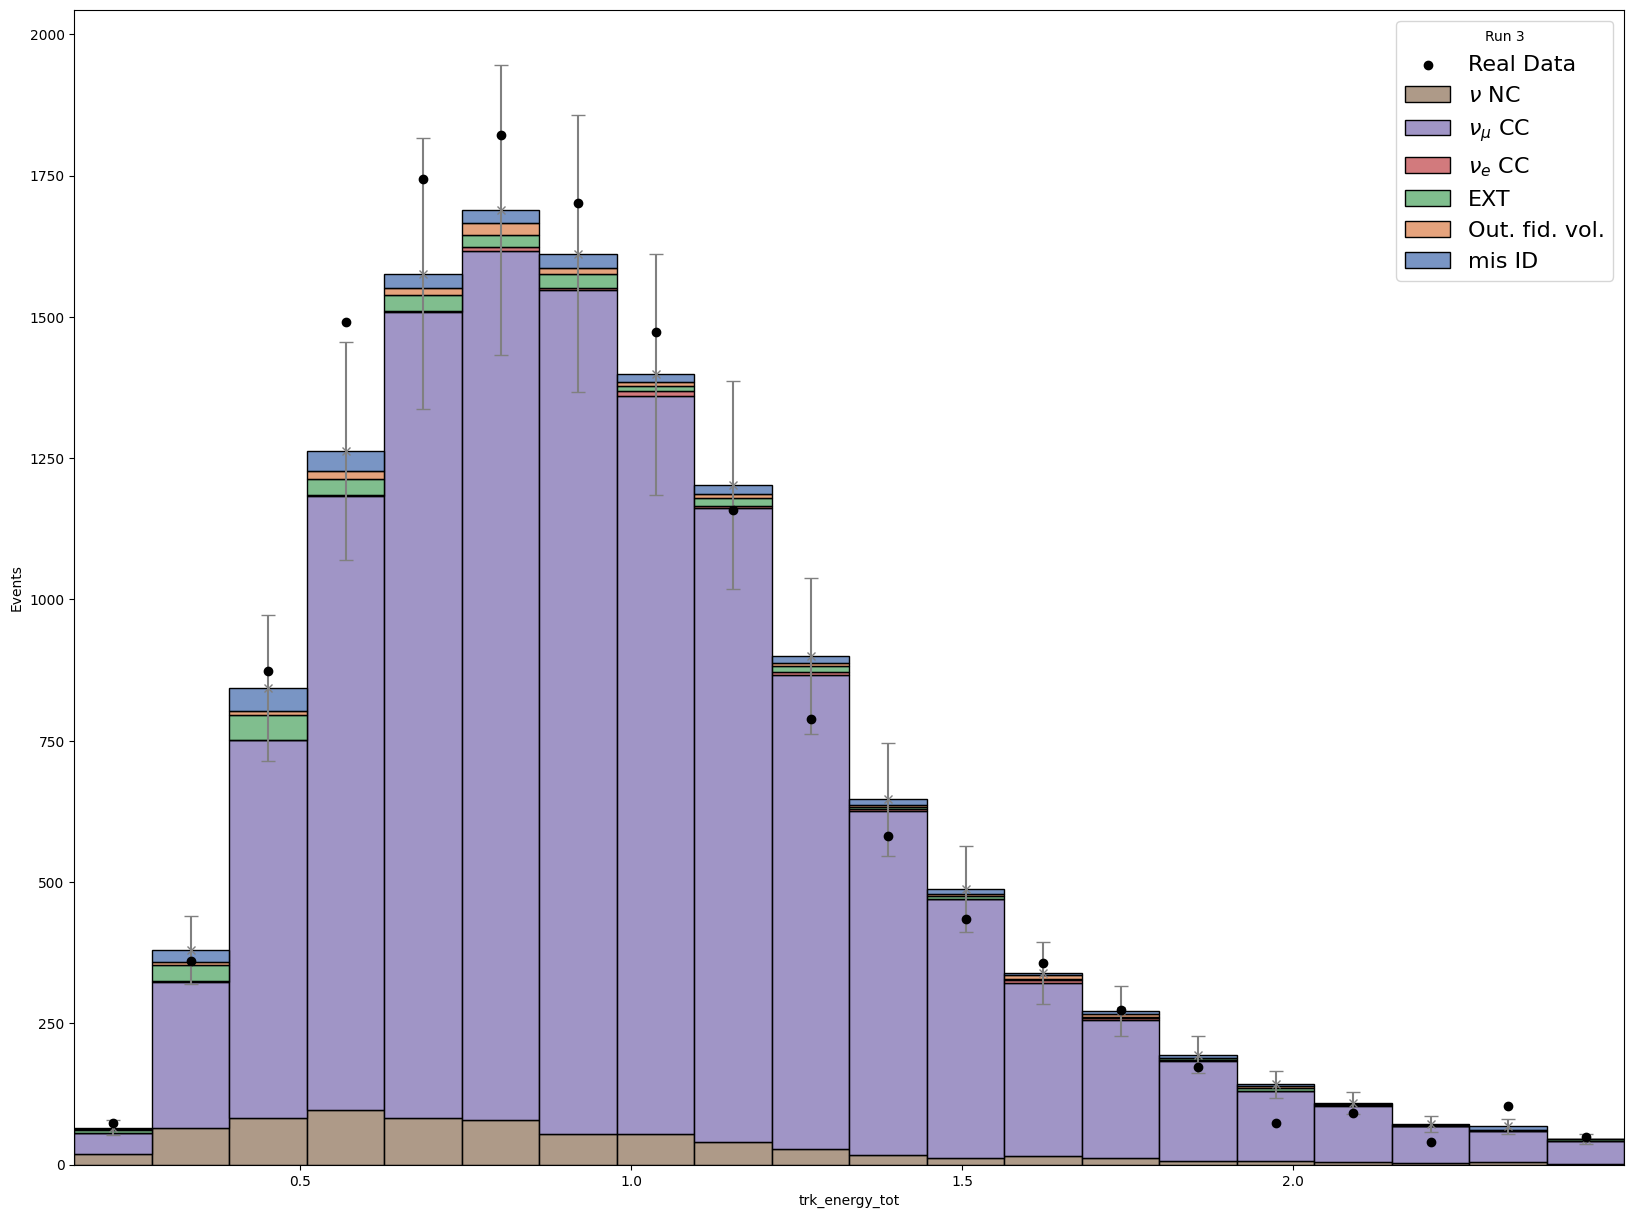

In [143]:
# Simple histogram plot of one variable.
BIN = 20
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT_cut_top_score_energy_add, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_cut_top_score_energy_add['weight'], bins = BIN, legend = False)
i.set(xlabel='trk_energy_tot', ylabel = "Events")

counts, bin_edges = np.histogram(MC_EXT_cut_top_score_energy_add['trk_energy_tot'], bins=BIN, weights=MC_EXT_cut_top_score_energy_add['weight'])

bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2

sys_unc = counts * 0.15  # Systematic uncertainty (15% of counts).
stat_unc = np.sqrt(counts)  # Statistical uncertainty (sqrt of counts) from poisson statistics.
unc = np.sqrt(sys_unc**2 + stat_unc**2)  # Total uncertainty.

# Uncertainty
for i in range(len(bin_centres)):
    plt.errorbar(bin_centres[i], counts[i], yerr=unc[i], fmt='x', color='gray', capsize=5)    

real_counts, _ = np.histogram(data_frame_cut_top_score_energy_add['trk_energy_tot'], bins=bin_edges)

plt.scatter(bin_centres, real_counts, color='black', zorder=3)

plt.xlim([np.min(MC_EXT_cut_top_score_energy_add['trk_energy_tot']), np.max(MC_EXT_cut_top_score_energy_add['trk_energy_tot'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"Real Data", r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
plt.show(i)


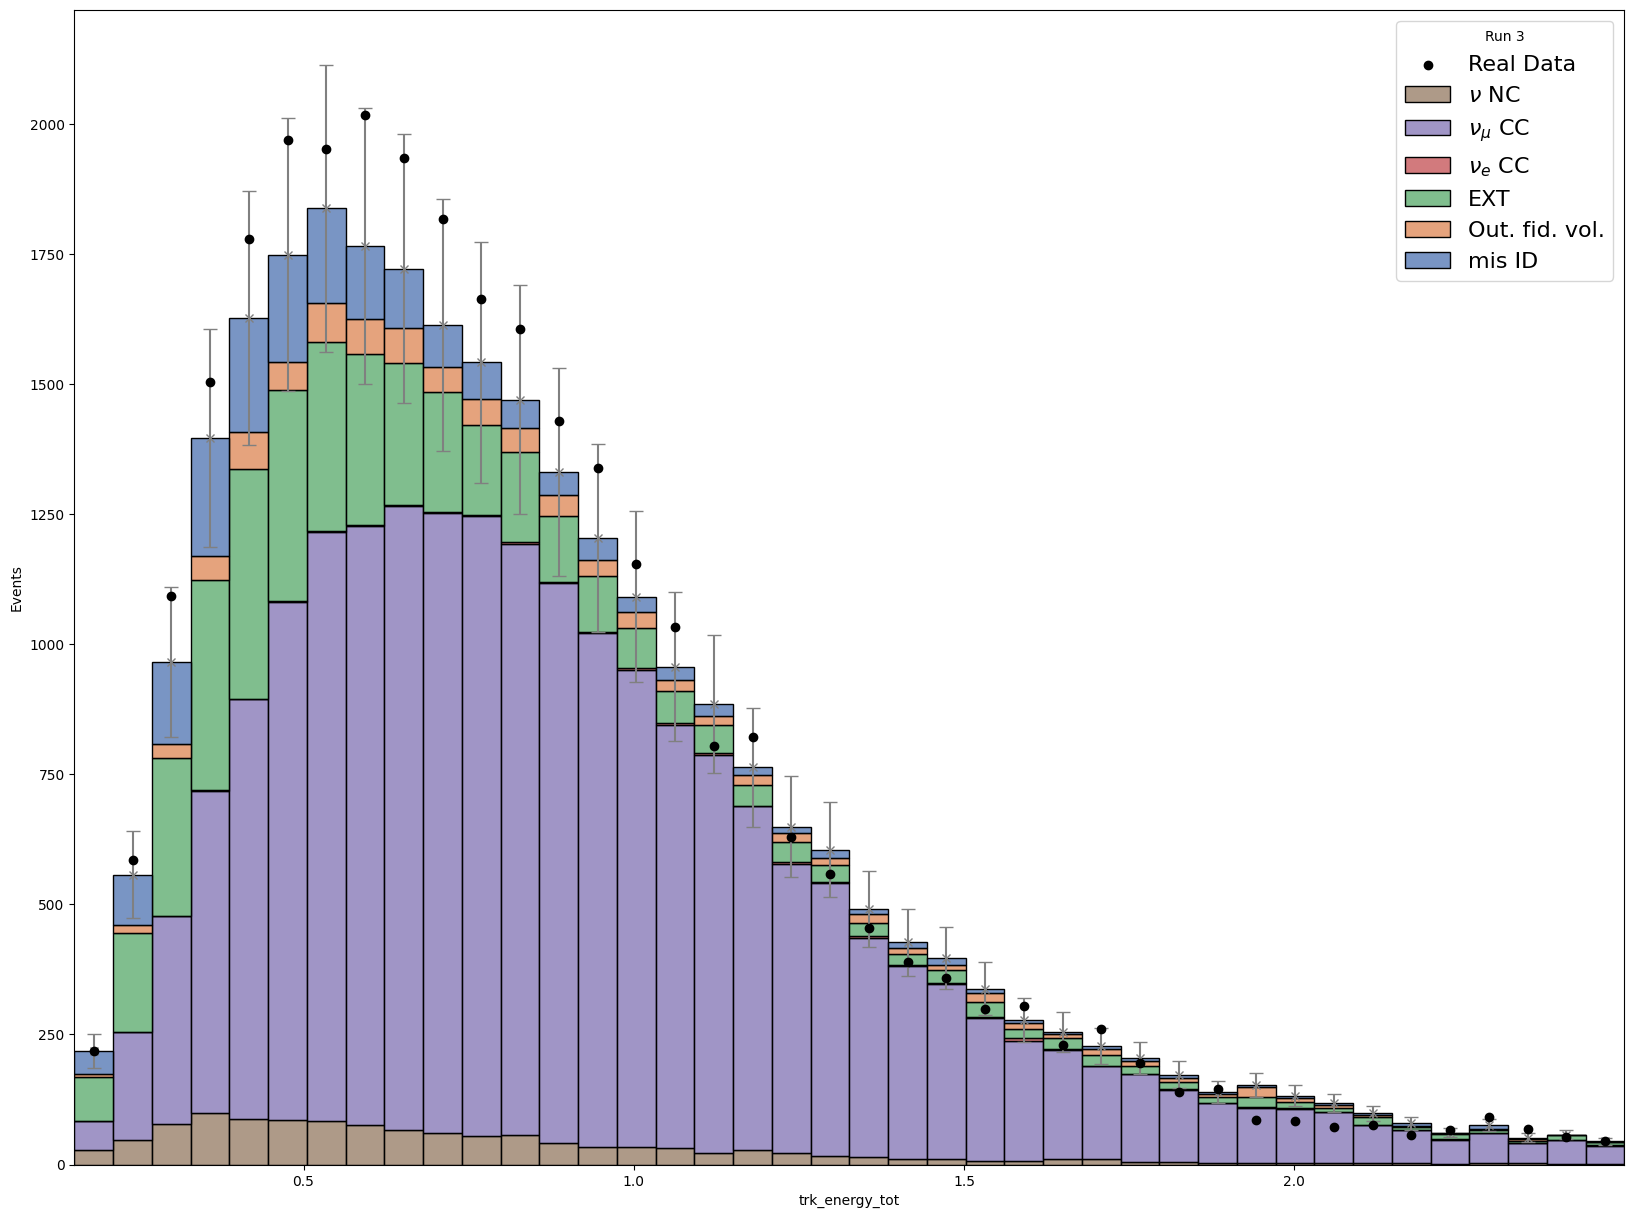

In [111]:
# Simple histogram plot of one variable.
BIN = 40
plt.figure(figsize=(20,15))
i = sns.histplot(data=MC_EXT_cut_trk_energy_tot, x='trk_energy_tot', multiple="stack", hue="category", palette = 'deep', weights = MC_EXT_cut_trk_energy_tot['weight'], bins = BIN, legend = False)
i.set(xlabel='trk_energy_tot', ylabel = "Events")

counts, bin_edges = np.histogram(MC_EXT_cut_trk_energy_tot['trk_energy_tot'], bins=BIN, weights=MC_EXT_cut_trk_energy_tot['weight'])

bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2

# Uncertainty
for i in range(len(bin_centres)):
    plt.errorbar(bin_centres[i], counts[i], yerr=counts[i] * 0.15, fmt='x', color='gray', capsize=5)

real_counts, _ = np.histogram(data_frame['trk_energy_tot'], bins=bin_edges)

bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.scatter(bin_centres, real_counts, color='black', zorder=3)

plt.xlim([np.min(MC_EXT_cut_trk_energy_tot['trk_energy_tot']), np.max(MC_EXT_cut_trk_energy_tot['trk_energy_tot'])])
plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"Real Data", r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"mis ID"])
plt.show(i)

# Exercise 10: Oscillation and fitting

### a) Define functions requires for Oscillation analysis, test that they work!


In [ ]:
# oscillation function


In [ ]:
# muon disappearance application to reconstructed neutrino energy


In [ ]:
# chi squared function


# Exercise 11/12: Oscillation parameter scan, contour plotting, closure test.

### Closure test, create your oscillation parameter scanning code, and find minimum values for chi squared!

In [ ]:
# Selection cuts on oscillated data

In [ ]:
# Function that oscillates and calculates chi squared for set delM21 and sin^2(2theta)

In [ ]:
# Function that loops the above function across range of values of delM21 and sin^2(2theta)

In [ ]:
# plot contourf function and find minimum!

Apply your above defined functions, and represent your result with matplotlib's contour and fcontour.

In [ ]:
# oscillate MC wrt to true data

In [ ]:
# contourf application

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

In [ ]:
# contour application, with correct confidence levels.

In [ ]:
# find lowest chi squared value within range and plot with CL, or contourf plot.

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

In [ ]:
# Produce your new oscillation parameter, which should be sin^2(2*theta_ue)

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

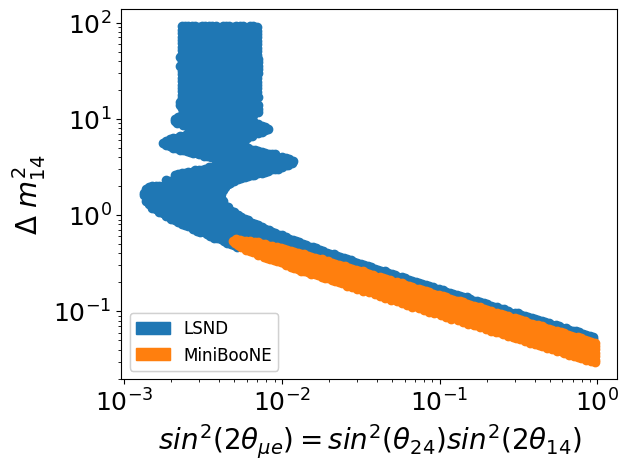

In [ ]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='tab:blue', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:orange', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)


plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()